In [65]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import progressbar


In [66]:


def func_prime_1(u, phi, phi_1):
    return phi_1

def func_prime_2(u, phi, phi_1):
    eps=1
    return (u**2-eps)*phi



min_y = 0
max_y = 6
N=1000
h=(max_y-min_y)/N


In [67]:

def rungekutta(y_i,yp_i,t_i):
    t=np.zeros(N)
        
    y_1 = np.zeros(N)
    y_2 = np.zeros(N)
    
    t[0]=t_i
    y_1[0]=y_i
    y_2[0]=yp_i
    for i in range(1,N):
        k1=h*func_prime_1(t[i-1],y_1[i-1],y_2[i-1])
        l1=h*func_prime_2(t[i-1],y_1[i-1],y_2[i-1])
                          
        k2=h*func_prime_1(t[i-1]+0.5*h,y_1[i-1]+k1*0.5,y_2[i-1]+0.5*l1)
        l2=h*func_prime_2(t[i-1]+0.5*h,y_1[i-1]+k1*0.5,y_2[i-1]+0.5*l1)

        k3=h*func_prime_1(t[i-1]+0.5*h,y_1[i-1]+k2*0.5,y_2[i-1]+0.5*l2)
        l3=h*func_prime_2(t[i-1]+0.5*h,y_1[i-1]+k2*0.5,y_2[i-1]+0.5*l2)

        k4=h*func_prime_1(t[i-1]+h,y_1[i-1]+k3,y_2[i-1]+l3)
        l4=h*func_prime_2(t[i-1]+h,y_1[i-1]+k3,y_2[i-1]+l3)

        y_1[i] = (1.0/6.0)*(k1+2*k2+2*k3+k4)+y_1[i-1]
        y_2[i] = (1.0/6.0)*(l1+2*l2+2*l3+l4)+y_2[i-1]
        t[i] = t[i-1]+h

    
    return t,y_1, y_2

In [68]:


def RKsol(t_i,y_i,yp_i):
    
    

    
    tnew,ynew1,ynew2 = rungekutta(t_i,y_i,yp_i)
        
    return tnew,ynew1,ynew2


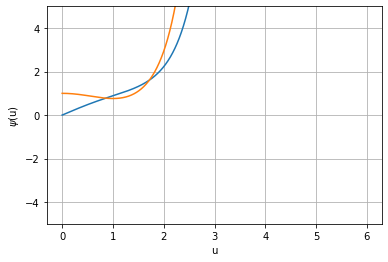

In [69]:


#print(RKsol(0,1,0)[0])
#plt.plot(t,RKsol(0,1)[0] )
plt.plot(RKsol(0,1,0)[0],RKsol(0,1,0)[1])
plt.plot(RKsol(0,1,0)[0],RKsol(0,1,0)[2])
#plt.plot(RKsol(0,1,0)[0],np.cos(2.0*x))
plt.xlabel('u')
plt.ylabel('$\psi$(u)')
plt.ylim(-5,5)
plt.grid()


In [70]:

def euler(a,aa,aaa,eps):
    
    min_y = 0
    max_y = 10
    N=10000
    h=(max_y-min_y)/N
    u = np.zeros(N)
    y_1 = np.zeros(N)
    y_2 = np.zeros(N)
    u[0]   = a
    y_1[0] = aa
    y_2[0] = aaa


    for i in range(1,N):
        
        u[i]=u[i-1]+h
        
        y_1[i]=y_2[i-1]*h+y_1[i-1]
        
        y_2[i]=y_2[i-1]+(u[i]**2-2*eps)*y_1[i-1]*h
        
    return u,y_1,y_2


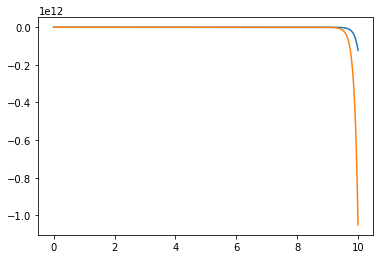

In [71]:

plt.plot(euler(0,1,0,13)[0],euler(0,1,0,13)[1])
plt.plot(euler(0,1,0,13)[0],euler(0,1,0,13)[2])

(-7, 7)

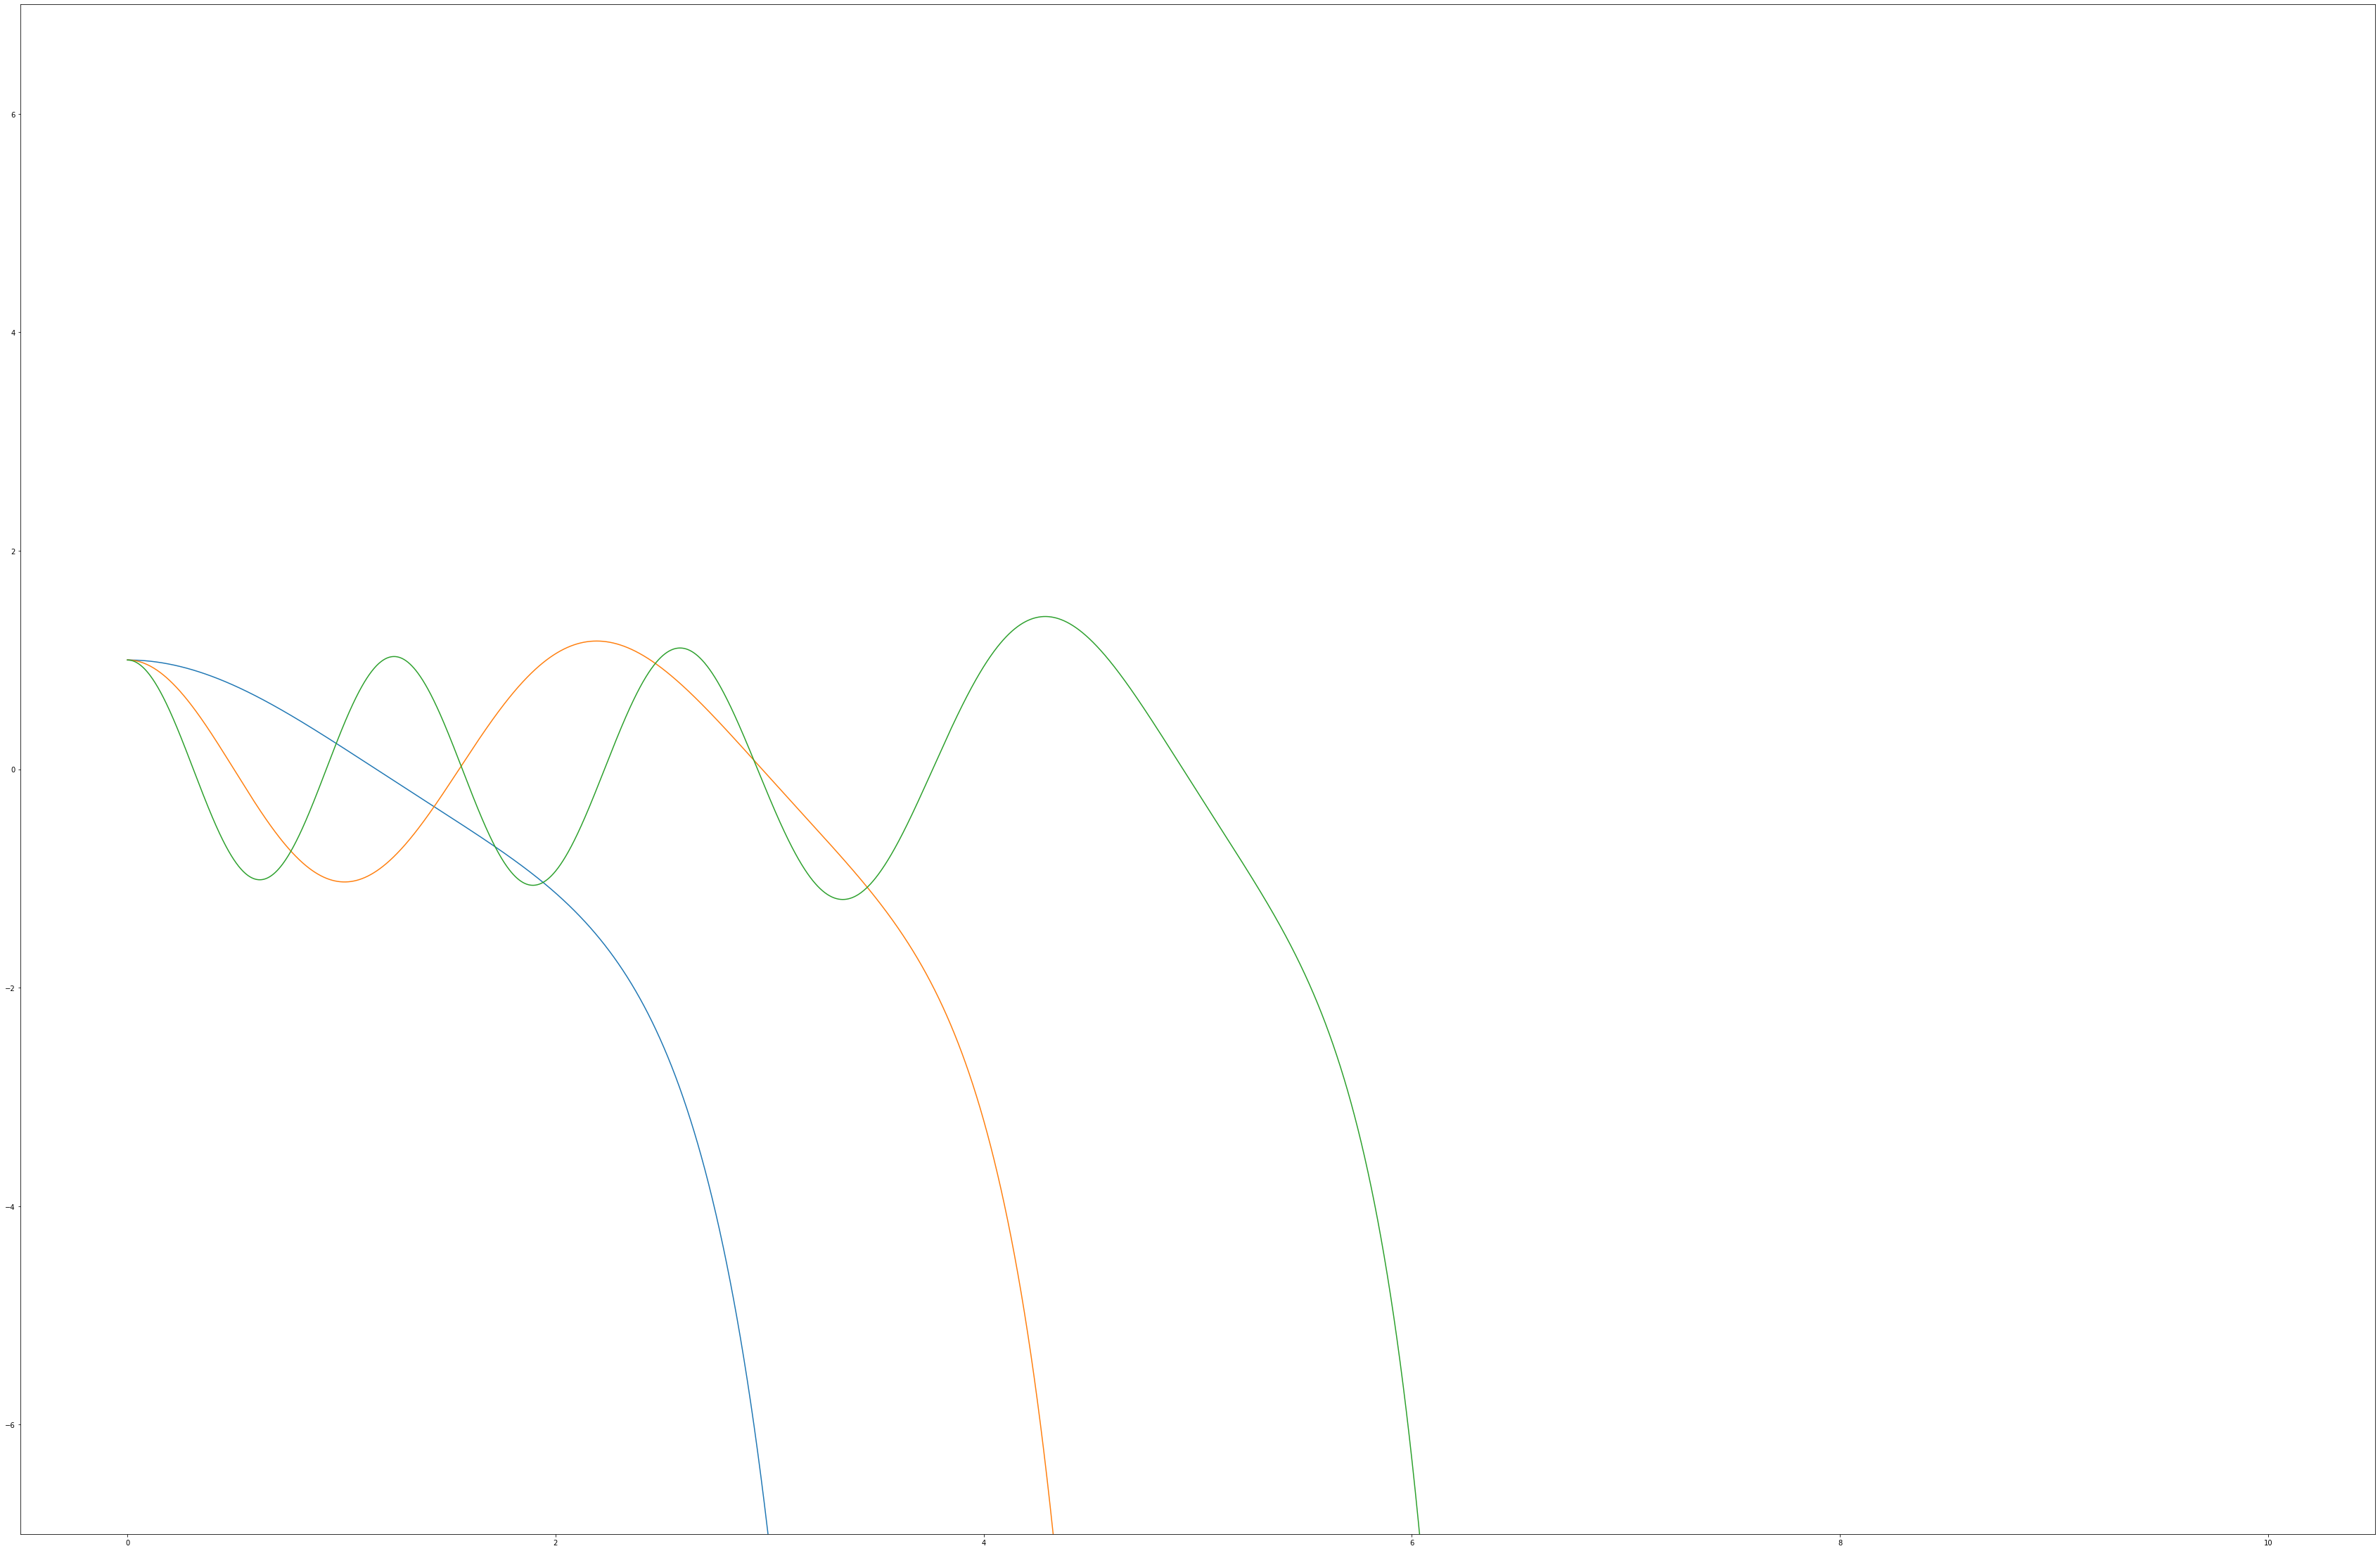

In [72]:


plt.figure(figsize=(60,40))
#for i in range(1,15,2):
plt.plot(euler(0,1,0,1)[0],euler(0,1,0,1)[1])
plt.plot(euler(0,1,0,5)[0],euler(0,1,0,5)[1])
plt.plot(euler(0,1,0,13)[0],euler(0,1,0,13)[1])
plt.ylim(-7,7)
    

(0, 5)

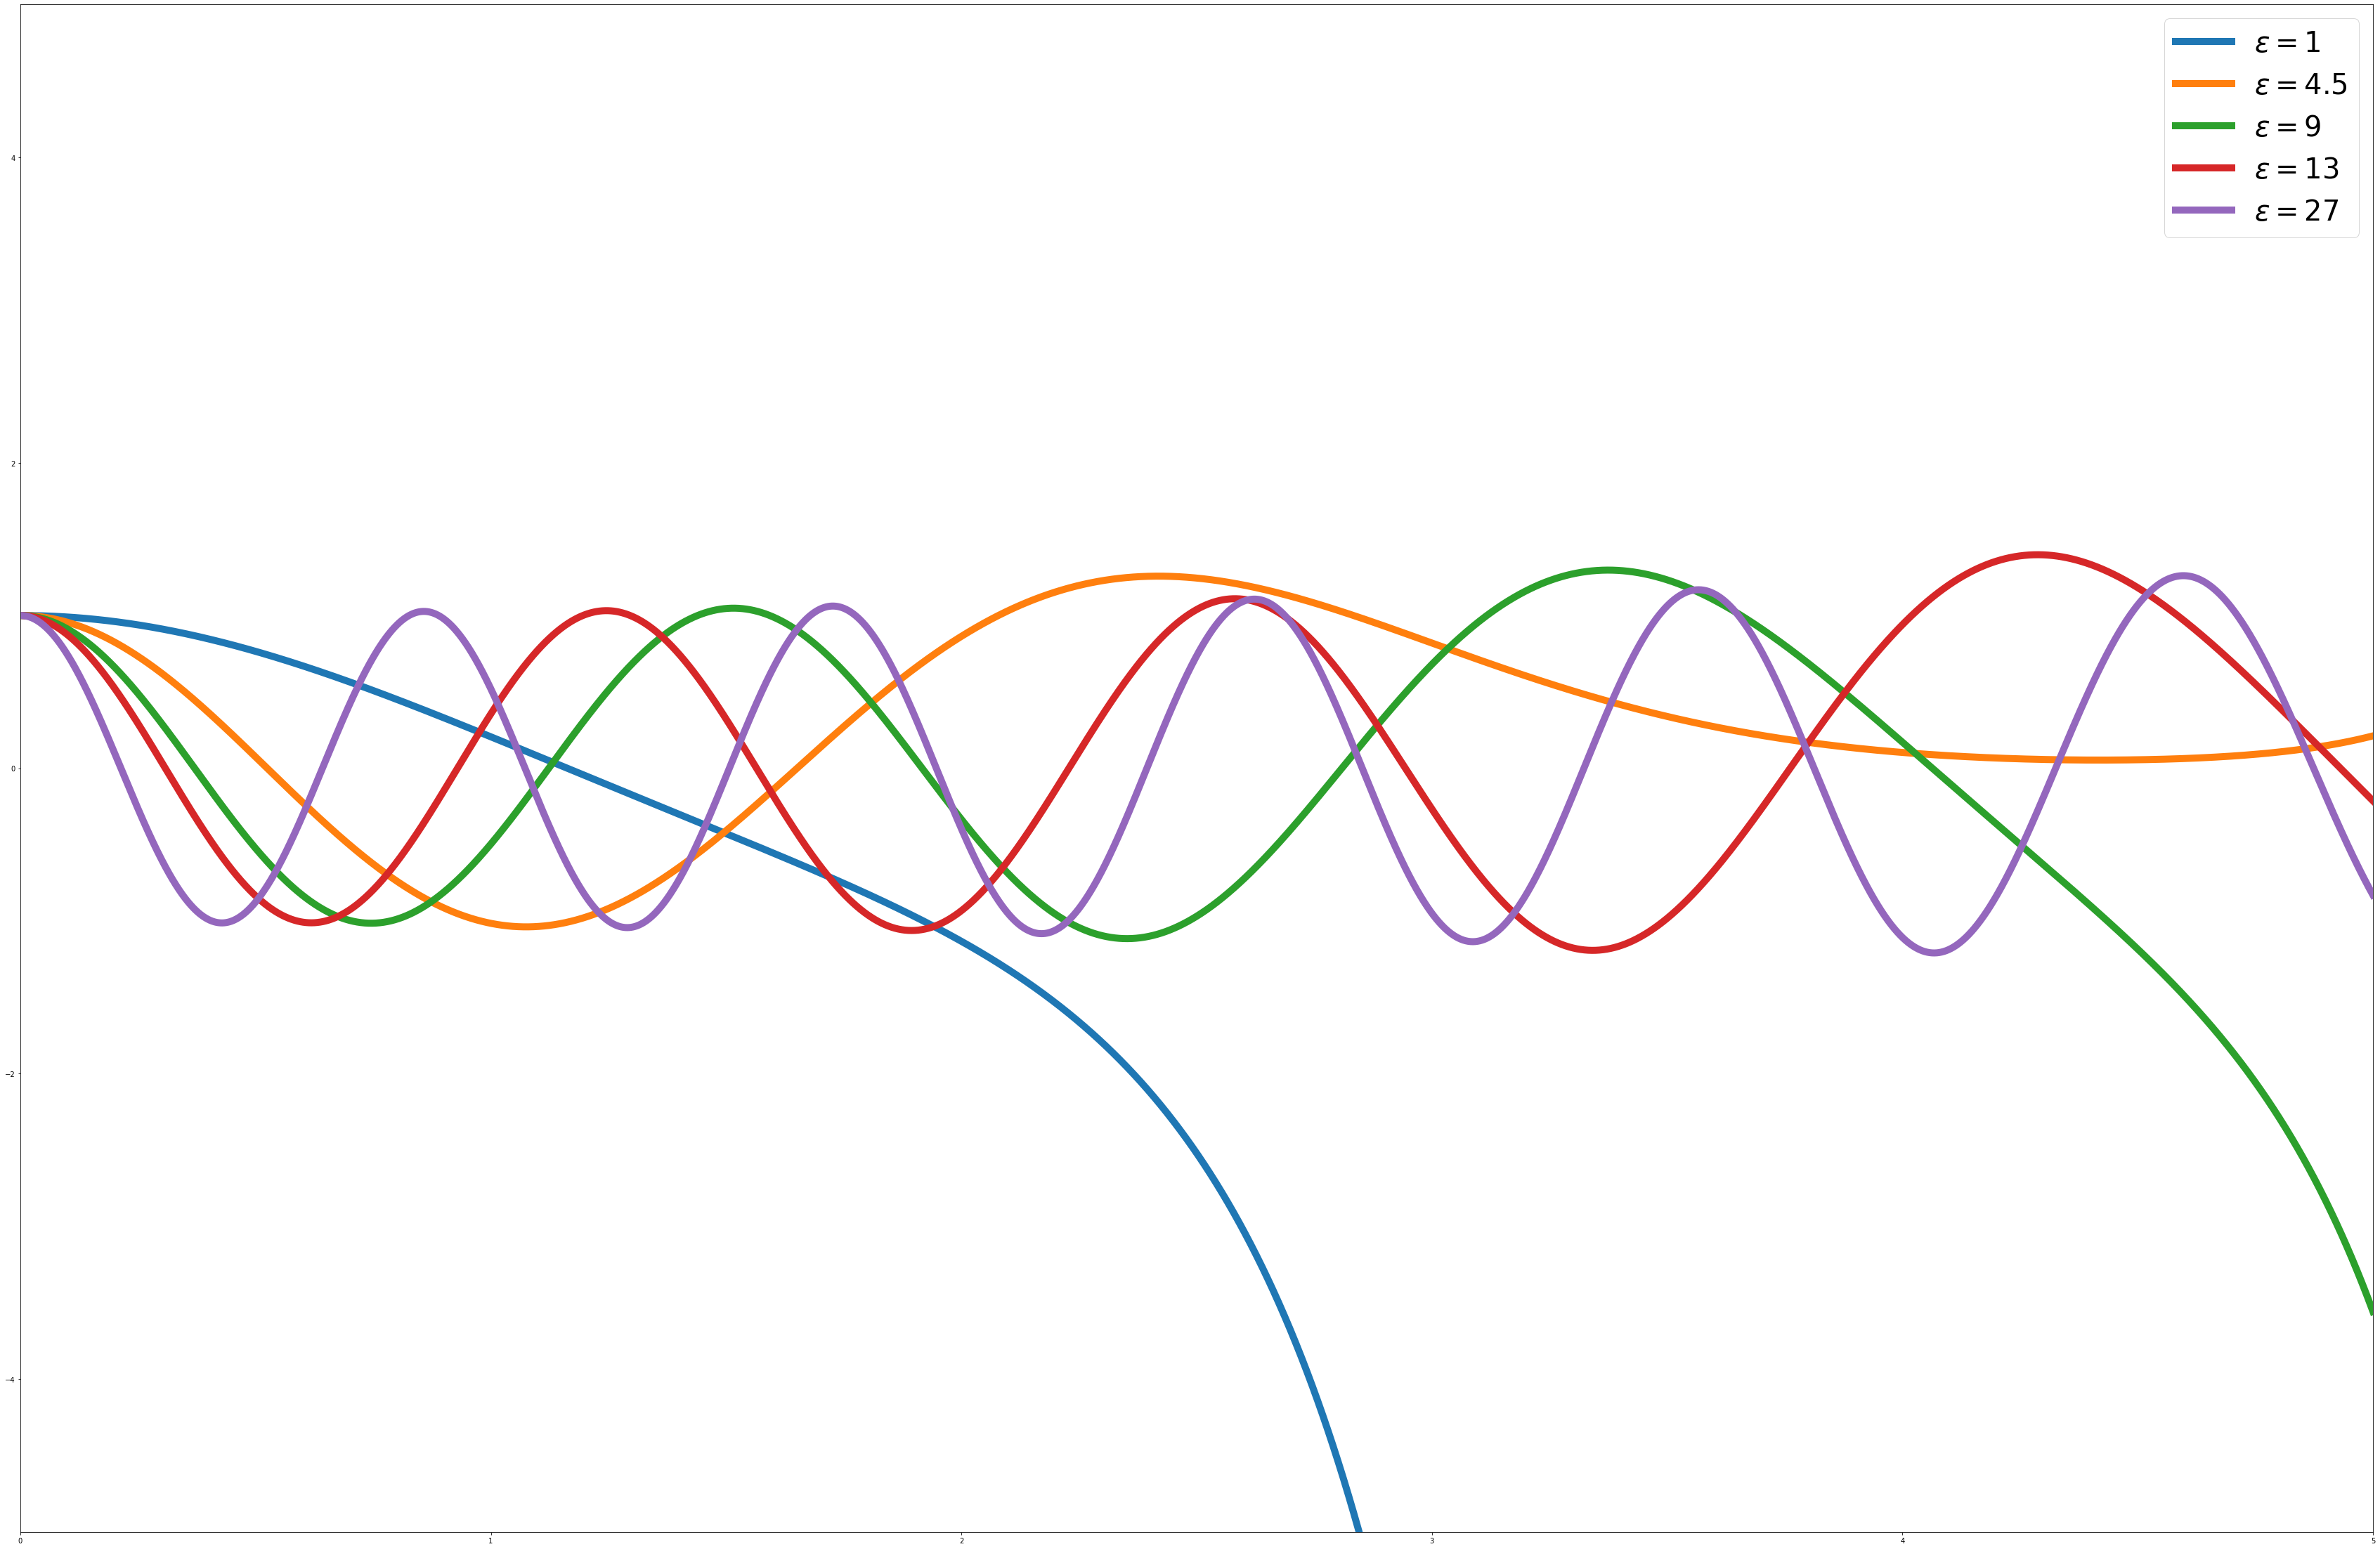

In [73]:
plt.figure(figsize=(60,40))
#for i in range(1,15,2):
#
plt.plot(euler(0,1,0,1)[0],euler(0,1,0,1)[1],linewidth=10,label="$\epsilon = 1$")
plt.plot(euler(0,1,0,4.5)[0],euler(0,1,0,4.5)[1],linewidth=10,label="$\epsilon = 4.5$")

plt.plot(euler(0,1,0,9)[0],euler(0,1,0,9)[1],linewidth=10,label="$\epsilon = 9$")
plt.plot(euler(0,1,0,13)[0],euler(0,1,0,13)[1],linewidth=10,label="$\epsilon = 13$")
plt.plot(euler(0,1,0,27)[0],euler(0,1,0,27)[1],linewidth=10,label="$\epsilon = 27$")

plt.legend(fontsize=40)
plt.ylim(-5,5)
plt.xlim(0,5)

In [74]:
def machete(arr):
    for i in range(len(arr[0])):
        if np.abs(arr[1][i])<0.075 and np.abs(arr[2][i])<0.0005:
            for j in range(i,len(arr[0])):
                arr[1][j]=0
            
    return arr
    

(-5, 5)

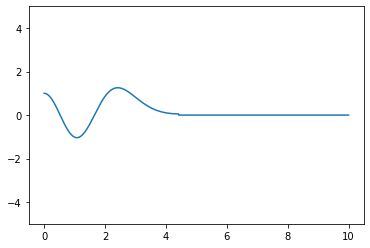

In [75]:

plt.plot(machete(euler(0,1,0,4.5))[0],machete(euler(0,1,0,4.5))[1])
plt.ylim(-5,5)


(0, 5)

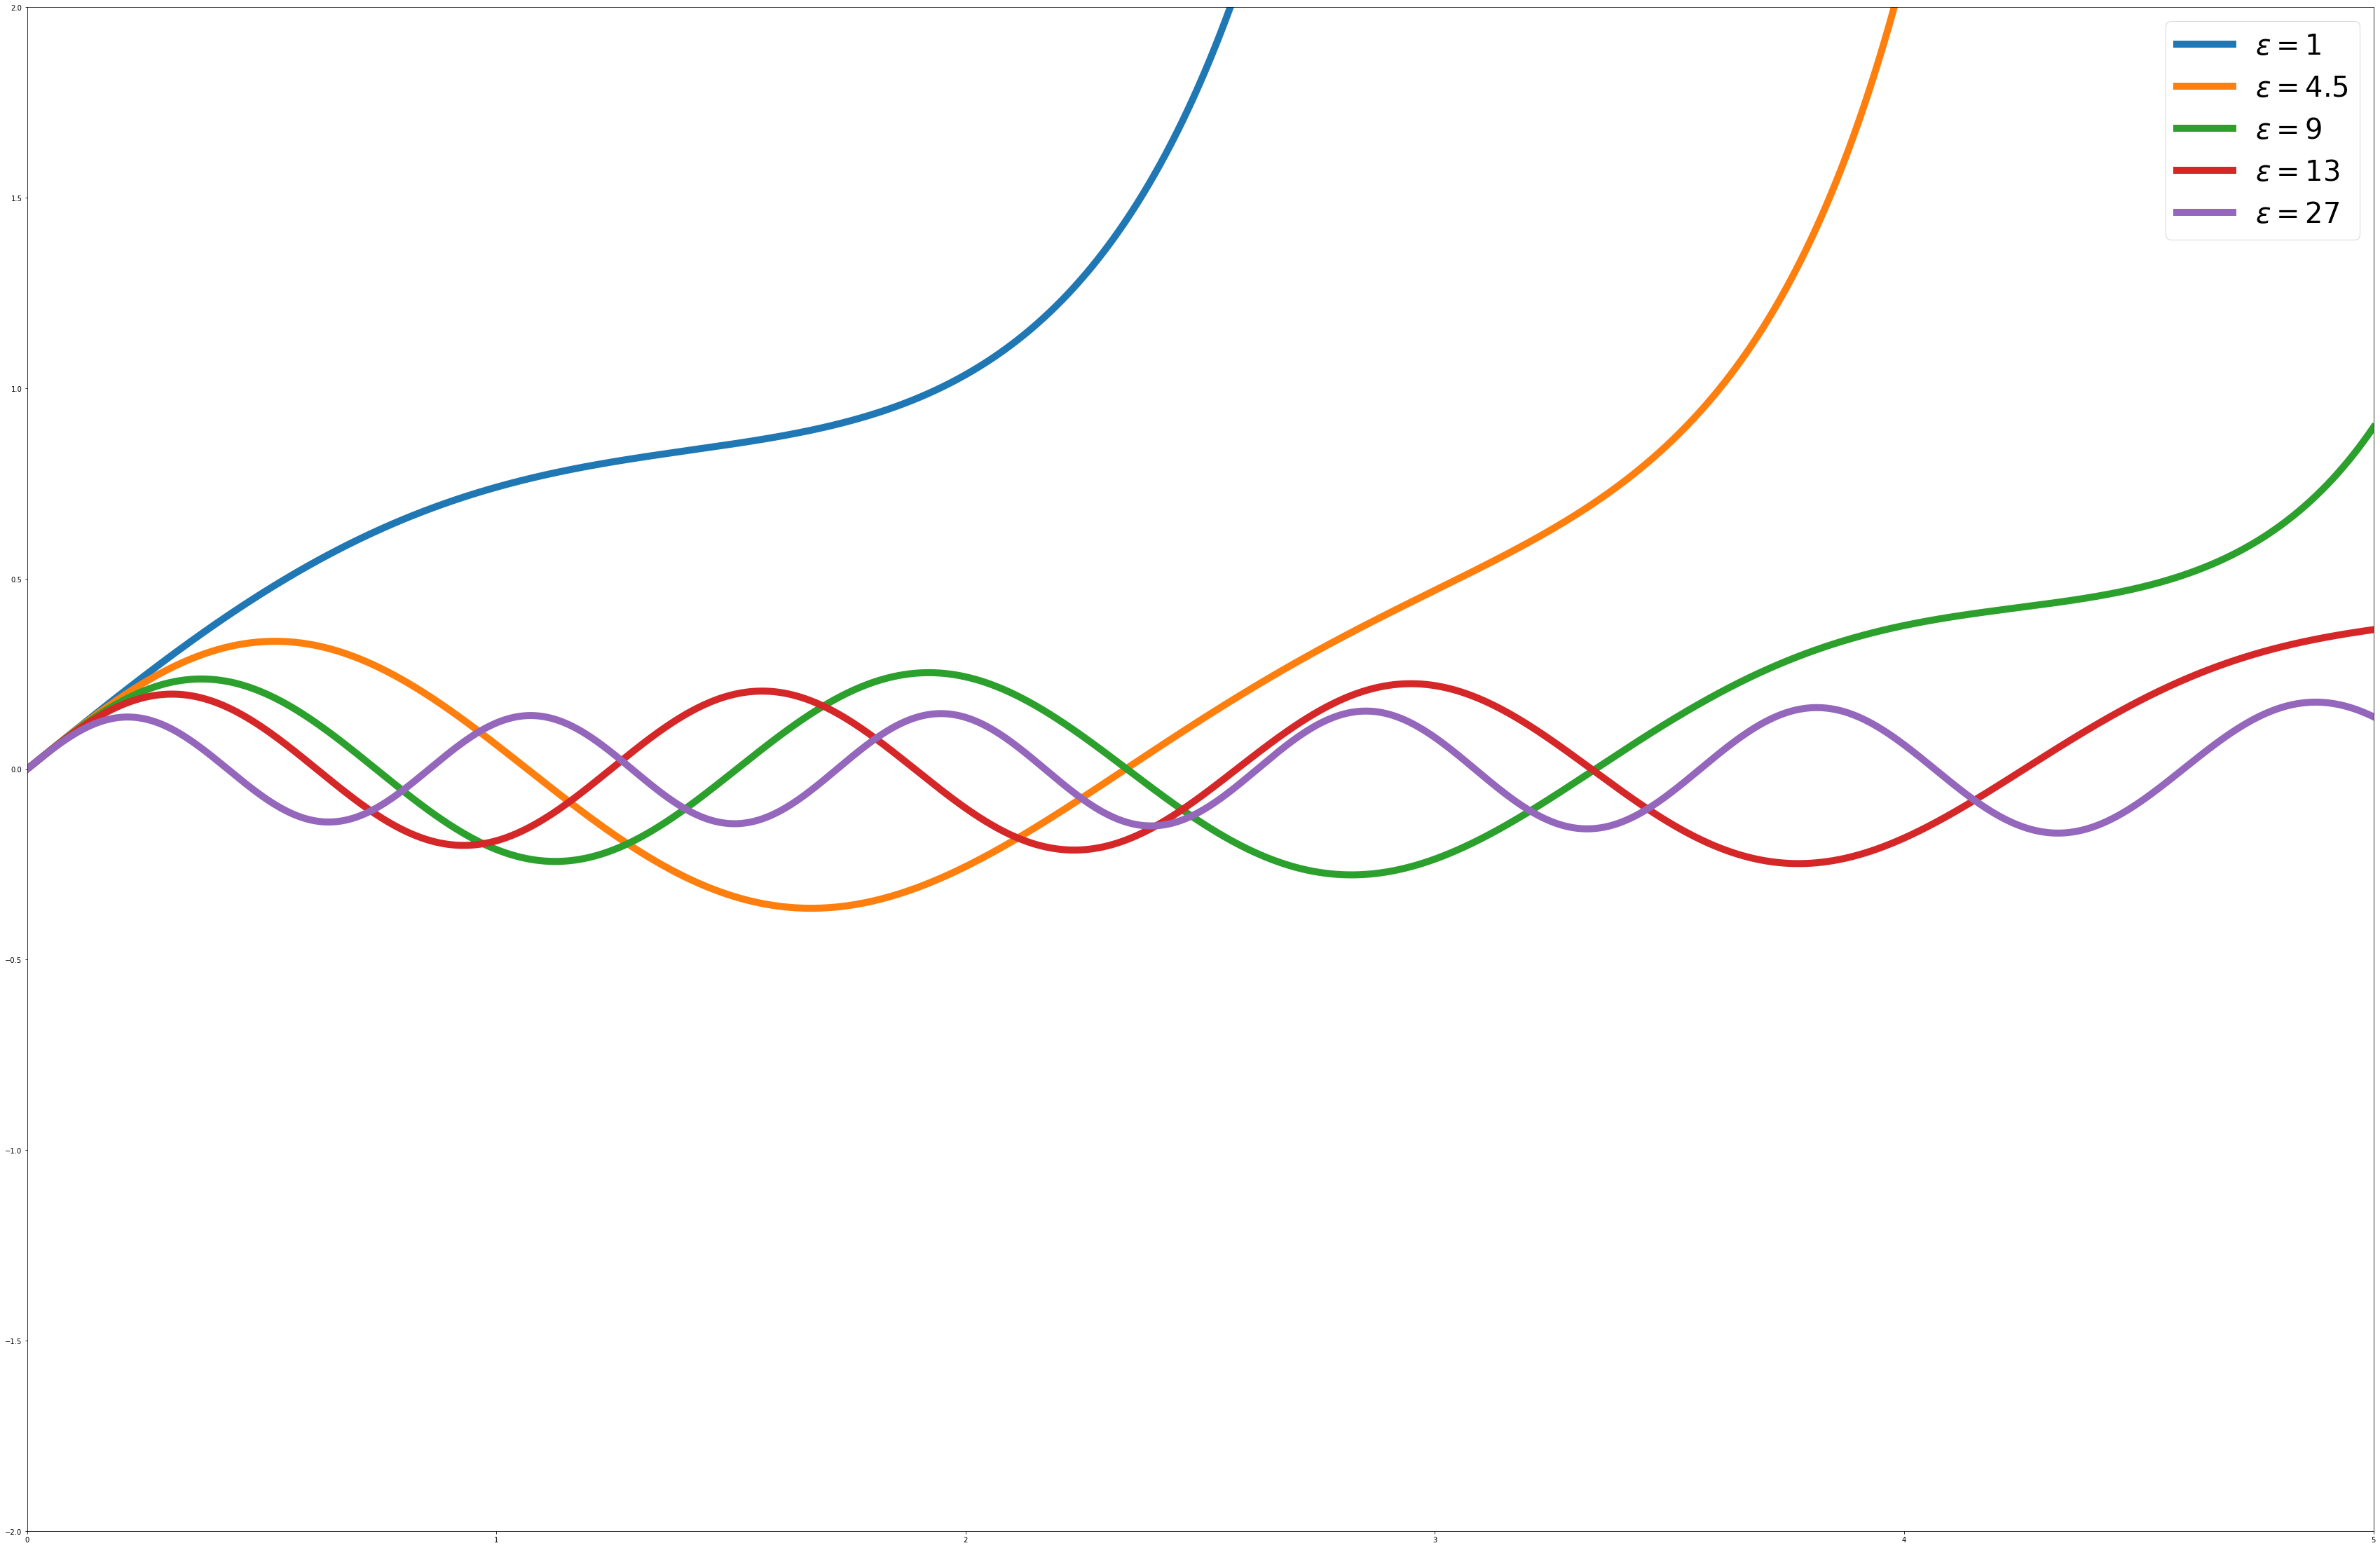

In [76]:
plt.figure(figsize=(60,40))
#for i in range(1,15,2):
#
plt.plot(euler(0,0,1,1)[0],euler(0,0,1,1)[1],linewidth=10,label="$\epsilon = 1$")
plt.plot(euler(0,0,1,4.5)[0],euler(0,0,1,4.5)[1],linewidth=10,label="$\epsilon = 4.5$")

plt.plot(euler(0,0,1,9)[0],euler(0,0,1,9)[1],linewidth=10,label="$\epsilon = 9$")
plt.plot(euler(0,0,1,13)[0],euler(0,0,1,13)[1],linewidth=10,label="$\epsilon = 13$")
plt.plot(euler(0,0,1,27)[0],euler(0,0,1,27)[1],linewidth=10,label="$\epsilon = 27$")

plt.legend(fontsize=40)
plt.ylim(-2,2)
plt.xlim(0,5)


In [13]:
def testvalues(N):
    Rank=np.linspace(0,100,N)
    vals=[]
    plt.figure(figsize=(80,60))
    bar = progressbar.ProgressBar(max_value=N)
    for i in range(len(Rank)):
        bar.update(i)
        
        plt.plot(euler(0,0,1,Rank[i])[0],euler(0,0,1,Rank[i])[1],linewidth=1)
        
        maxim=np.amax(np.abs(euler(0,0,1,Rank[i])[1]))
        
        if (maxim < 10):
            print(maxim)
            print(euler(0,0,1,Rank[i])[1])
            vals.append(Rank[i])
    return vals,len(vals)
            
    
        

 33% (337 of 1000) |#######              | Elapsed Time: 0:00:43 ETA:   0:01:35

7.354487068676291
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -7.27319507e+00
 -7.31372145e+00 -7.35448707e+00]


 35% (356 of 1000) |#######              | Elapsed Time: 0:00:45 ETA:   0:01:06

5.163496411010477
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -5.11015536e+00
 -5.13675156e+00 -5.16349641e+00]
2.3157793379744755
[0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 2.29193741e+00
 2.30382527e+00 2.31577934e+00]


 35% (357 of 1000) |#######              | Elapsed Time: 0:00:45 ETA:   0:01:06

8.915743086130142
[0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 8.82432785e+00
 8.86990889e+00 8.91574309e+00]


 37% (374 of 1000) |#######              | Elapsed Time: 0:00:46 ETA:   0:00:57

7.230357751129629
[0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 7.16105260e+00
 7.19561392e+00 7.23035775e+00]
4.3568381191970476
[0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 4.31527509e+00
 4.33600205e+00 4.35683812e+00]


 37% (376 of 1000) |#######              | Elapsed Time: 0:00:47 ETA:   0:00:58

1.6591968959254701
[0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 1.64345527e+00
 1.65130547e+00 1.65919690e+00]
0.8120517440820396
[ 0.          0.001       0.002      ... -0.80434946 -0.80819059
 -0.81205174]


 37% (378 of 1000) |#######              | Elapsed Time: 0:00:47 ETA:   0:00:58

3.017173376631644
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -2.98875081e+00
 -3.00292520e+00 -3.01717338e+00]
4.927074323608848
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -4.88089419e+00
 -4.90392451e+00 -4.92707432e+00]


 38% (380 of 1000) |#######              | Elapsed Time: 0:00:47 ETA:   0:00:59

6.522921725064447
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -6.46208456e+00
 -6.49242468e+00 -6.52292173e+00]
7.795556976388076
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -7.72320751e+00
 -7.75928924e+00 -7.79555698e+00]


 38% (382 of 1000) |########             | Elapsed Time: 0:00:47 ETA:   0:01:01

8.744737964153696
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -8.66398062e+00
 -8.70425583e+00 -8.74473796e+00]
9.378245748100081
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -9.29207037e+00
 -9.33504802e+00 -9.37824575e+00]


 38% (384 of 1000) |########             | Elapsed Time: 0:00:48 ETA:   0:01:04

9.710890716178382
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -9.62210914e+00
 -9.66638695e+00 -9.71089072e+00]
9.76345188902527
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -9.67464586e+00
 -9.71893625e+00 -9.76345189e+00]


 38% (385 of 1000) |########             | Elapsed Time: 0:00:48 ETA:   0:01:08

9.561581078602035
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -9.47506143e+00
 -9.51821190e+00 -9.56158108e+00]
9.134701123821095
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -9.05247810e+00
 -9.09348604e+00 -9.13470112e+00]

 38% (387 of 1000) |########             | Elapsed Time: 0:00:48 ETA:   0:01:13


8.514924543644192
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -8.43868875e+00
 -8.47671094e+00 -8.51492454e+00]


 38% (389 of 1000) |########             | Elapsed Time: 0:00:48 ETA:   0:01:16

7.736015772153101
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -7.66712908e+00
 -7.70148624e+00 -7.73601577e+00]
6.832416772132437
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -6.77191237e+00
 -6.80208913e+00 -6.83241677e+00]


 39% (391 of 1000) |########             | Elapsed Time: 0:00:49 ETA:   0:01:16

5.838352358729034
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -5.78694293e+00
 -5.81258375e+00 -5.83835236e+00]
4.7870280896671105
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -4.74512106e+00
 -4.76602266e+00 -4.78702809e+00]


 39% (393 of 1000) |########             | Elapsed Time: 0:00:49 ETA:   0:01:16

3.7099301712099346
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -3.67764898e+00
 -3.69374970e+00 -3.70993017e+00]
2.636233557728185
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -2.61344371e+00
 -2.62481056e+00 -2.63623356e+00]


 39% (394 of 1000) |########             | Elapsed Time: 0:00:49 ETA:   0:01:18

1.5923213453928817
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -1.57866016e+00
 -1.58547395e+00 -1.59232135e+00]
0.6014157248909524
[ 0.          0.001       0.002      ... -0.59632468 -0.59886392
 -0.60141572]


 39% (395 of 1000) |########             | Elapsed Time: 0:00:49 ETA:   0:01:19

0.31668179830877863


 39% (396 of 1000) |########             | Elapsed Time: 0:00:50 ETA:   0:01:42

[0.         0.001      0.002      ... 0.31392324 0.31529924 0.3166818 ]


 39% (397 of 1000) |########             | Elapsed Time: 0:00:50 ETA:   0:02:05

1.1457454571549661
[0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 1.13598542e+00
 1.14085369e+00 1.14574546e+00]


 39% (398 of 1000) |########             | Elapsed Time: 0:00:50 ETA:   0:02:16

1.8731820152869638
[0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 1.85736217e+00
 1.86525307e+00 1.87318202e+00]
2.4899973543802


 40% (400 of 1000) |########             | Elapsed Time: 0:00:51 ETA:   0:02:31

[0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 2.46912002e+00
 2.47953365e+00 2.48999735e+00]
2.990682167627033
[0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 2.96577917e+00
 2.97820089e+00 2.99068217e+00]


 40% (401 of 1000) |########             | Elapsed Time: 0:00:51 ETA:   0:02:34

3.3730269963386568
[0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 3.34513100e+00
 3.35904575e+00 3.37302700e+00]
3.6378774560424794
[0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 3.60799606e+00
 3.62290126e+00 3.63787746e+00]

 40% (402 of 1000) |########             | Elapsed Time: 0:00:51 ETA:   0:02:33


3.7888408094070525
[0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 3.75793389e+00
 3.77335075e+00 3.78884081e+00]

 40% (403 of 1000) |########             | Elapsed Time: 0:00:51 ETA:   0:02:35


3.831955078504403


 40% (405 of 1000) |########             | Elapsed Time: 0:00:52 ETA:   0:02:25

[0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 3.80091549e+00
 3.81639865e+00 3.83195508e+00]
3.7753316745786925
[0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 3.74496953e+00
 3.76011488e+00 3.77533167e+00]


 40% (406 of 1000) |########             | Elapsed Time: 0:00:52 ETA:   0:02:02

3.6287820885896425
[0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 3.59981258e+00
 3.61426335e+00 3.62878209e+00]
3.403438561105728
[0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 3.37647331e+00
 3.38992440e+00 3.40343856e+00]


 40% (408 of 1000) |########             | Elapsed Time: 0:00:52 ETA:   0:01:57

3.1113778673966688
[0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 3.08691965e+00
 3.09912024e+00 3.11137787e+00]
2.765256444812785

 40% (409 of 1000) |########             | Elapsed Time: 0:00:52 ETA:   0:01:44


[0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 2.74369705e+00
 2.75445167e+00 2.76525644e+00]


 41% (410 of 1000) |########             | Elapsed Time: 0:00:53 ETA:   0:01:51

2.3779640862584386
[0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 2.35958518e+00
 2.36875330e+00 2.37796409e+00]


 41% (411 of 1000) |########             | Elapsed Time: 0:00:53 ETA:   0:01:53

1.962302356243696
[0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 1.94727884e+00
 1.95477319e+00 1.96230236e+00]
1.5306927834872117

 41% (412 of 1000) |########             | Elapsed Time: 0:00:53 ETA:   0:01:54


[0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 1.51909855e+00
 1.52488224e+00 1.53069278e+00]
1.094918773185477


 41% (414 of 1000) |########             | Elapsed Time: 0:00:53 ETA:   0:01:53

[0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 1.08673432e+00
 1.09081705e+00 1.09491877e+00]
0.6659040872944295
[0.         0.001      0.002      ... 0.6610257  0.66345918 0.66590409]


 41% (415 of 1000) |########             | Elapsed Time: 0:00:54 ETA:   0:01:57

0.25481260501571706
[0.         0.001      0.002      ... 0.25177983 0.25265261 0.25352968]


 41% (416 of 1000) |########             | Elapsed Time: 0:00:54 ETA:   0:02:04

0.2479626912811918
[ 0.          0.001       0.002      ... -0.13237175 -0.1329399
 -0.13351029]


 41% (417 of 1000) |########             | Elapsed Time: 0:00:54 ETA:   0:02:16

0.4878134985940601
[ 0.          0.001       0.002      ... -0.48407758 -0.4859415
 -0.4878135 ]


 41% (418 of 1000) |########             | Elapsed Time: 0:00:54 ETA:   0:02:12

0.8033363673605901
[ 0.          0.001       0.002      ... -0.79733314 -0.80032818
 -0.80333637]
1.075424732101349


 41% (419 of 1000) |########             | Elapsed Time: 0:00:55 ETA:   0:02:10

[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -1.06751156e+00
 -1.07145946e+00 -1.07542473e+00]
1.30081053346431
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -1.29136079e+00
 -1.29607528e+00 -1.30081053e+00]

 42% (421 of 1000) |########             | Elapsed Time: 0:00:55 ETA:   0:01:57


1.4775774698456012
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -1.46696981e+00
 -1.47226200e+00 -1.47757747e+00]


 42% (422 of 1000) |########             | Elapsed Time: 0:00:55 ETA:   0:01:55

1.6050989361809793
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -1.59370750e+00
 -1.59939073e+00 -1.60509894e+00]
1.6839518987941882

 42% (423 of 1000) |########             | Elapsed Time: 0:00:55 ETA:   0:01:57


[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -1.67213741e+00
 -1.67803172e+00 -1.68395190e+00]
1.71581057046479

 42% (424 of 1000) |########             | Elapsed Time: 0:00:55 ETA:   0:01:58


[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -1.70391264e+00
 -1.70984859e+00 -1.71581057e+00]
1.7033238638760173
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -1.69165442e+00
 -1.69747639e+00 -1.70332386e+00]

 42% (426 of 1000) |########             | Elapsed Time: 0:00:56 ETA:   0:01:52


1.6499806216477004
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -1.63881864e+00
 -1.64438744e+00 -1.64998062e+00]


 42% (427 of 1000) |########             | Elapsed Time: 0:00:56 ETA:   0:01:46

1.5599665550019333
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -1.54955402e+00
 -1.55474892e+00 -1.55996656e+00]
1.43801667956994


 42% (428 of 1000) |########             | Elapsed Time: 0:00:56 ETA:   0:01:45

[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -1.42855582e+00
 -1.43327591e+00 -1.43801668e+00]
1.2892668255455495


 42% (429 of 1000) |#########            | Elapsed Time: 0:00:56 ETA:   0:01:41

[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -1.28091852e+00
 -1.28508353e+00 -1.28926683e+00]
1.1191075304789713
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -1.11199089e+00
 -1.11554138e+00 -1.11910753e+00]

 43% (431 of 1000) |#########            | Elapsed Time: 0:00:57 ETA:   0:01:40


0.9330433069156668
[ 0.          0.001       0.002      ... -0.92723627 -0.93013336
 -0.93304331]


 43% (432 of 1000) |#########            | Elapsed Time: 0:00:57 ETA:   0:01:39

0.7365599243075599
[ 0.          0.001       0.002      ... -0.73210084 -0.73432538
 -0.73655992]
0.535001965476299


 43% (434 of 1000) |#########            | Elapsed Time: 0:00:57 ETA:   0:01:40

[ 0.          0.001       0.002      ... -0.53189194 -0.53344337
 -0.53500197]
0.33346252236059143
[ 0.          0.001       0.002      ... -0.33166853 -0.33256333
 -0.33346252]


 43% (436 of 1000) |#########            | Elapsed Time: 0:00:57 ETA:   0:01:37

0.2553338280698404
[ 0.          0.001       0.002      ... -0.13614503 -0.13641487
 -0.13668649]
0.24849923200437452
[0.         0.001      0.002      ... 0.0503903  0.05070055 0.05101146]


 43% (437 of 1000) |#########            | Elapsed Time: 0:00:58 ETA:   0:01:36

0.24277675606115698
[0.         0.001      0.002      ... 0.22414175 0.22497625 0.2258136 ]
0.3844502303989735

 43% (439 of 1000) |#########            | Elapsed Time: 0:00:58 ETA:   0:01:36


[0.         0.001      0.002      ... 0.38185705 0.38315126 0.38445023]
0.5242351435295789
[0.         0.001      0.002      ... 0.52086285 0.5225458  0.52423514]


 44% (440 of 1000) |#########            | Elapsed Time: 0:00:58 ETA:   0:01:35

0.6430859522824413
[0.         0.001      0.002      ... 0.63908504 0.64108164 0.64308595]
0.7395298399237534
[0.         0.001      0.002      ... 0.73505471 0.73728791 0.73952984]

 44% (442 of 1000) |#########            | Elapsed Time: 0:00:58 ETA:   0:01:32


0.8126957081934746
[0.         0.001      0.002      ... 0.80790053 0.8102934  0.81269571]


 44% (444 of 1000) |#########            | Elapsed Time: 0:00:59 ETA:   0:01:30

0.8622938425666715
[0.         0.001      0.002      ... 0.85732876 0.85980638 0.86229384]
0.8885844074402819
[0.         0.001      0.002      ... 0.88359212 0.88608329 0.88858441]


 44% (446 of 1000) |#########            | Elapsed Time: 0:00:59 ETA:   0:01:25

0.8923362183097205
[0.         0.001      0.002      ... 0.88744905 0.88988772 0.89233622]
0.8747773345609158
[0.         0.001      0.002      ... 0.87011472 0.8724413  0.87477733]


 44% (448 of 1000) |#########            | Elapsed Time: 0:00:59 ETA:   0:01:21

0.8375390746237644
[0.         0.001      0.002      ... 0.8332056  0.83536789 0.83753907]
0.782595076693976
[0.         0.001      0.002      ... 0.77867899 0.78063296 0.78259508]


 45% (450 of 1000) |#########            | Elapsed Time: 0:00:59 ETA:   0:01:17

0.7121970153915906
[0.         0.001      0.002      ... 0.70876927 0.7104795  0.71219702]
0.6288085404267193
[0.         0.001      0.002      ... 0.62592232 0.62736228 0.62880854]


 45% (452 of 1000) |#########            | Elapsed Time: 0:01:00 ETA:   0:01:14

0.5350389308185246
[0.         0.001      0.002      ... 0.53272961 0.53388164 0.53503893]
0.4335778609927615
[0.         0.001      0.002      ... 0.43186346 0.43271857 0.43357786]


 45% (454 of 1000) |#########            | Elapsed Time: 0:01:00 ETA:   0:01:10

0.32713255690111376
[0.         0.001      0.002      ... 0.3260145  0.32657199 0.32713256]
0.26461177225566607
[0.         0.001      0.002      ... 0.21783279 0.21809963 0.21836849]


 45% (456 of 1000) |#########            | Elapsed Time: 0:01:00 ETA:   0:01:08

0.25615043495495904
[0.         0.001      0.002      ... 0.10987325 0.10986341 0.10985457]
0.24932260078035404
[0.         0.001      0.002      ... 0.00454652 0.00428012 0.00401377]


 45% (458 of 1000) |#########            | Elapsed Time: 0:01:00 ETA:   0:01:05

0.24360372023365318
[ 0.          0.001       0.002      ... -0.09592425 -0.09642186
 -0.0969203 ]
0.23869386829301437
[ 0.          0.001       0.002      ... -0.18954012 -0.19023937
 -0.19094022]


 46% (460 of 1000) |#########            | Elapsed Time: 0:01:01 ETA:   0:01:02

0.2762946859811933
[ 0.          0.001       0.002      ... -0.27455625 -0.27542433
 -0.27629469]
0.35151142938164315
[ 0.          0.001       0.002      ... -0.34950473 -0.35050667
 -0.35151143]


 46% (462 of 1000) |#########            | Elapsed Time: 0:01:01 ETA:   0:00:59

0.4154129698427127
[ 0.          0.001       0.002      ... -0.41321045 -0.41431008
 -0.41541297]
0.4671254106245832
[ 0.          0.001       0.002      ... -0.46479989 -0.46596087
 -0.46712541]


 46% (464 of 1000) |#########            | Elapsed Time: 0:01:01 ETA:   0:00:59

0.506080480040161
[ 0.          0.001       0.002      ... -0.50370333 -0.50489002
 -0.50608048]
0.5320111887977215
[ 0.          0.001       0.002      ... -0.52965065 -0.530829
 -0.53201119]


 46% (466 of 1000) |#########            | Elapsed Time: 0:01:01 ETA:   0:01:00

0.5449415676151909
[ 0.          0.001       0.002      ... -0.54266125 -0.54379949
 -0.54494157]
0.5451710376373681
[ 0.          0.001       0.002      ... -0.5430286  -0.54409795
 -0.54517104]


 46% (468 of 1000) |#########            | Elapsed Time: 0:01:02 ETA:   0:01:01

0.5332540375206167
[ 0.          0.001       0.002      ... -0.53130012 -0.53227531
 -0.53325404]
0.5099755858350002
[ 0.          0.001       0.002      ... -0.50825298 -0.50911264
 -0.50997559]


 47% (470 of 1000) |#########            | Elapsed Time: 0:01:02 ETA:   0:01:03

0.476323495737358
[ 0.          0.001       0.002      ... -0.4748665  -0.47559351
 -0.4763235 ]
0.4334579810555836
[ 0.          0.001       0.002      ... -0.43229207 -0.43287371
 -0.43345798]


 47% (472 of 1000) |#########            | Elapsed Time: 0:01:02 ETA:   0:01:03

0.38267939963470465
[ 0.          0.001       0.002      ... -0.38182105 -0.3822491
 -0.3826794 ]
0.32539487190930516
[ 0.          0.001       0.002      ... -0.32485166 -0.32512235
 -0.32539487]


 47% (474 of 1000) |#########            | Elapsed Time: 0:01:02 ETA:   0:01:03

0.27689459926232796
[ 0.          0.001       0.002      ... -0.26285539 -0.26296922
 -0.26308449]
0.2657040815040399
[ 0.          0.001       0.002      ... -0.19734366 -0.19730522
 -0.19726781]


 47% (476 of 1000) |#########            | Elapsed Time: 0:01:02 ETA:   0:01:03

0.25724668787595895
[ 0.          0.001       0.002      ... -0.12983539 -0.12965298
 -0.12947123]
0.2504177228619135
[ 0.          0.001       0.002      ... -0.06182602 -0.06151132
 -0.06119692]


 47% (478 of 1000) |##########           | Elapsed Time: 0:01:03 ETA:   0:01:02

0.24469631056696142
[0.         0.001      0.002      ... 0.0052414  0.00567383 0.00610629]
0.23978312758678605
[0.         0.001      0.002      ... 0.07000279 0.07053599 0.07106951]


 48% (480 of 1000) |##########           | Elapsed Time: 0:01:03 ETA:   0:01:02

0.23548795453901772
[0.         0.001      0.002      ... 0.13119669 0.13181183 0.13242753]
0.23167993513958013
[0.         0.001      0.002      ... 0.1876848  0.18836172 0.1890394 ]


 48% (482 of 1000) |##########           | Elapsed Time: 0:01:03 ETA:   0:01:01

0.23990561708524877
[0.         0.001      0.002      ... 0.23846917 0.23918693 0.23990562]
0.28418173857472406
[0.         0.001      0.002      ... 0.28270583 0.28344327 0.28418174]


 48% (484 of 1000) |##########           | Elapsed Time: 0:01:03 ETA:   0:01:00

0.3211883804981124
[0.         0.001      0.002      ... 0.3197148  0.32045104 0.32118838]
0.35041755973345345
[0.         0.001      0.002      ... 0.34898654 0.34970148 0.35041756]


 48% (486 of 1000) |##########           | Elapsed Time: 0:01:04 ETA:   0:00:58

0.3715354564324296
[0.         0.001      0.002      ... 0.37018474 0.37085953 0.37153546]
0.3843817153674232
[0.         0.001      0.002      ... 0.38314576 0.38376319 0.38438172]


 48% (488 of 1000) |##########           | Elapsed Time: 0:01:04 ETA:   0:00:57

0.3889654674096334
[0.         0.001      0.002      ... 0.38787474 0.38841959 0.38896547]
0.3854583030013747
[0.         0.001      0.002      ... 0.38453869 0.38499802 0.3854583 ]


 49% (490 of 1000) |##########           | Elapsed Time: 0:01:04 ETA:   0:00:55

0.37418447363295515
[0.         0.001      0.002      ... 0.37345684 0.37382023 0.37418447]
0.3556086341153987
[0.         0.001      0.002      ... 0.35508848 0.35534819 0.35560863]


 49% (492 of 1000) |##########           | Elapsed Time: 0:01:04 ETA:   0:00:55

0.3303214676205361
[0.         0.001      0.002      ... 0.33001877 0.33016981 0.33032147]
0.2990235569539224
[0.         0.001      0.002      ... 0.29894268 0.29898287 0.29902356]


 49% (494 of 1000) |##########           | Elapsed Time: 0:01:04 ETA:   0:00:55

0.2782533115749779
[0.         0.001      0.002      ... 0.26264765 0.26257757 0.26250788]
0.2670723564039814
[0.         0.001      0.002      ... 0.22199523 0.22181813 0.22164131]


 49% (496 of 1000) |##########           | Elapsed Time: 0:01:05 ETA:   0:00:54

0.2586099609255016
[0.         0.001      0.002      ... 0.17790203 0.17762368 0.17734551]
0.25177247530653185
[0.         0.001      0.002      ... 0.13132054 0.13094901 0.13057759]


 49% (498 of 1000) |##########           | Elapsed Time: 0:01:05 ETA:   0:00:54

0.24604191743174422
[0.         0.001      0.002      ... 0.08321994 0.08276539 0.08231089]
0.24112061974454535
[0.         0.001      0.002      ... 0.03456751 0.03404187 0.03351624]


 50% (500 of 1000) |##########           | Elapsed Time: 0:01:05 ETA:   0:00:54

0.23681706593822854
[ 0.          0.001       0.002      ... -0.01368935 -0.01427267
 -0.01485599]
0.2330020761282738
[ 0.          0.001       0.002      ... -0.06063989 -0.06126634
 -0.06189279]


 50% (502 of 1000) |##########           | Elapsed Time: 0:01:05 ETA:   0:00:54

0.22958217146052426
[ 0.          0.001       0.002      ... -0.10542557 -0.10607981
 -0.10673404]
0.22648806072800753
[ 0.          0.001       0.002      ... -0.14725402 -0.14792029
 -0.14858651]


 50% (504 of 1000) |##########           | Elapsed Time: 0:01:06 ETA:   0:00:54

0.22366758274087165
[ 0.          0.001       0.002      ... -0.18541127 -0.18607374
 -0.1867361 ]
0.2210790297431853
[ 0.          0.001       0.002      ... -0.21927219 -0.2199153
 -0.22055824]


 50% (506 of 1000) |##########           | Elapsed Time: 0:01:06 ETA:   0:00:54

0.2495262047092789
[ 0.          0.001       0.002      ... -0.24830886 -0.24891765
 -0.2495262 ]
0.2732175120936991
[ 0.          0.001       0.002      ... -0.27209693 -0.27265737
 -0.27321751]


 50% (508 of 1000) |##########           | Elapsed Time: 0:01:06 ETA:   0:00:54

0.29131810240790423
[ 0.          0.001       0.002      ... -0.29031992 -0.2908192
 -0.2913181 ]
0.303624521052254
[ 0.          0.001       0.002      ... -0.30277145 -0.30319822
 -0.30362452]


 51% (510 of 1000) |##########           | Elapsed Time: 0:01:06 ETA:   0:00:53

0.3100440434001528
[ 0.          0.001       0.002      ... -0.30935546 -0.30970002
 -0.31004404]
0.3105928498518667
[ 0.          0.001       0.002      ... -0.31008439 -0.31033892
 -0.31059285]


 51% (512 of 1000) |##########           | Elapsed Time: 0:01:06 ETA:   0:00:53

0.3053923547888659
[ 0.          0.001       0.002      ... -0.30507568 -0.30523435
 -0.30539235]
0.29466382398985325
[ 0.          0.001       0.002      ... -0.29454644 -0.29460547
 -0.29466382]


 51% (514 of 1000) |##########           | Elapsed Time: 0:01:07 ETA:   0:00:53

0.279888460380699
[ 0.          0.001       0.002      ... -0.27880656 -0.27876436
 -0.27872144]
0.2687056896132262
[ 0.          0.001       0.002      ... -0.25825058 -0.25810764
 -0.25796398]


 51% (516 of 1000) |##########           | Elapsed Time: 0:01:07 ETA:   0:00:53

0.2602294265394986
[ 0.          0.001       0.002      ... -0.23334819 -0.23310711
 -0.23286535]
0.25337674458397696
[ 0.          0.001       0.002      ... -0.20463388 -0.2042993
 -0.20396408]


 51% (518 of 1000) |##########           | Elapsed Time: 0:01:07 ETA:   0:00:53

0.24763133448264732
[ 0.          0.001       0.002      ... -0.1726958  -0.17227424
 -0.17185209]
0.24269637792486867
[ 0.          0.001       0.002      ... -0.13816401 -0.13766374
 -0.13716297]


 52% (520 of 1000) |##########           | Elapsed Time: 0:01:07 ETA:   0:00:52

0.23838080893137928
[ 0.          0.001       0.002      ... -0.10169848 -0.10112933
 -0.1005598 ]
0.23455452089588225
[ 0.          0.001       0.002      ... -0.06397691 -0.06335007
 -0.06272297]


 52% (522 of 1000) |##########           | Elapsed Time: 0:01:08 ETA:   0:00:52

0.23112434470109072
[ 0.          0.001       0.002      ... -0.02568263 -0.0250104
 -0.02433806]
0.22802141436678827
[0.         0.001      0.002      ... 0.01250715 0.0132116  0.01391599]


 52% (524 of 1000) |###########          | Elapsed Time: 0:01:08 ETA:   0:00:52

0.2251930834068033
[0.         0.001      0.002      ... 0.04993268 0.05065557 0.05137824]
0.22259748240011618
[0.         0.001      0.002      ... 0.08596234 0.08668957 0.0874164 ]


 52% (526 of 1000) |###########          | Elapsed Time: 0:01:08 ETA:   0:00:51

0.2202022049541223
[0.         0.001      0.002      ... 0.12000253 0.12071994 0.12143676]
0.21798079102721943
[0.         0.001      0.002      ... 0.15150663 0.15220026 0.15289311]


 52% (528 of 1000) |###########          | Elapsed Time: 0:01:08 ETA:   0:00:51

0.21591198861551164
[0.         0.001      0.002      ... 0.17998287 0.18063924 0.18129464]
0.21397748911569345
[0.         0.001      0.002      ... 0.20500111 0.20560746 0.20621267]


 53% (530 of 1000) |###########          | Elapsed Time: 0:01:08 ETA:   0:00:51

0.22728616768298032
[0.         0.001      0.002      ... 0.22619842 0.22674295 0.22728617]
0.2442260007284885
[0.         0.001      0.002      ... 0.24328334 0.24375539 0.244226  ]


 53% (532 of 1000) |###########          | Elapsed Time: 0:01:09 ETA:   0:00:51

0.2568178950721947
[0.         0.001      0.002      ... 0.25603887 0.25642917 0.2568179 ]
0.2649240772421461
[0.         0.001      0.002      ... 0.26432422 0.26462499 0.26492408]


 53% (534 of 1000) |###########          | Elapsed Time: 0:01:09 ETA:   0:00:50

0.26848364047228473
[0.         0.001      0.002      ... 0.26807517 0.26828028 0.26848364]
0.26751165735391447
[0.         0.001      0.002      ... 0.26730332 0.26740839 0.26751166]


 53% (536 of 1000) |###########          | Elapsed Time: 0:01:09 ETA:   0:00:51

0.2620970952729562
[0.         0.001      0.002      ... 0.262094   0.26209646 0.2620971 ]
0.2552222987366763
[0.         0.001      0.002      ... 0.25260317 0.25250229 0.25239961]


 53% (537 of 1000) |###########          | Elapsed Time: 0:01:09 ETA:   0:00:53

0.24945663229180368
[0.         0.001      0.002      ... 0.23905321 0.23885012 0.23864527]


 53% (538 of 1000) |###########          | Elapsed Time: 0:01:09 ETA:   0:00:56

0.24450286194906673
[0.         0.001      0.002      ... 0.22172781 0.22142545 0.22112142]
0.2401706235439755


 53% (539 of 1000) |###########          | Elapsed Time: 0:01:10 ETA:   0:00:58

[0.         0.001      0.002      ... 0.20096601 0.20056908 0.20017059]
0.23632984513528082
[0.         0.001      0.002      ... 0.17715551 0.17667036 0.1761838 ]

 54% (540 of 1000) |###########          | Elapsed Time: 0:01:10 ETA:   0:01:01


0.23288628645073384
[0.         0.001      0.002      ... 0.1507254  0.15015995 0.14959326]

 54% (541 of 1000) |###########          | Elapsed Time: 0:01:10 ETA:   0:01:04


0.2297711280989969


 54% (542 of 1000) |###########          | Elapsed Time: 0:01:10 ETA:   0:01:11

[0.         0.001      0.002      ... 0.1221385  0.12150203 0.12086455]


 54% (543 of 1000) |###########          | Elapsed Time: 0:01:11 ETA:   0:01:25

0.22693201908544686
[0.         0.001      0.002      ... 0.09188323 0.09118629 0.09048857]
0.22432669570981548

 54% (544 of 1000) |###########          | Elapsed Time: 0:01:11 ETA:   0:01:33


[0.         0.001      0.002      ... 0.06046544 0.05971961 0.05897325]


 54% (545 of 1000) |###########          | Elapsed Time: 0:01:11 ETA:   0:01:37

0.2219226710297269
[0.         0.001      0.002      ... 0.02840011 0.0276178  0.02683524]
0.21969339428791995


 54% (546 of 1000) |###########          | Elapsed Time: 0:01:11 ETA:   0:01:38

[ 0.          0.001       0.002      ... -0.00379691 -0.00460265
 -0.00540835]
0.21761702199702265

 54% (547 of 1000) |###########          | Elapsed Time: 0:01:12 ETA:   0:01:42


[ 0.          0.001       0.002      ... -0.0356169  -0.03643261
 -0.03724799]


 54% (548 of 1000) |###########          | Elapsed Time: 0:01:12 ETA:   0:01:48

0.21567551715975947
[ 0.          0.001       0.002      ... -0.06656596 -0.06737801
 -0.06818943]


 54% (549 of 1000) |###########          | Elapsed Time: 0:01:12 ETA:   0:01:53

0.21385435509250258
[ 0.          0.001       0.002      ... -0.09617237 -0.09696718
 -0.09776105]


 55% (550 of 1000) |###########          | Elapsed Time: 0:01:12 ETA:   0:01:48

0.21214000022210144
[ 0.          0.001       0.002      ... -0.12399331 -0.12475757
 -0.1255206 ]
0.21052162134040703

 55% (551 of 1000) |###########          | Elapsed Time: 0:01:12 ETA:   0:01:45


[ 0.          0.001       0.002      ... -0.14962106 -0.15034196
 -0.15106134]


 55% (553 of 1000) |###########          | Elapsed Time: 0:01:13 ETA:   0:01:34

0.20899030254962922
[ 0.          0.001       0.002      ... -0.17268849 -0.17335392
 -0.17401756]
0.2075375800798246
[ 0.          0.001       0.002      ... -0.19287381 -0.19347254
 -0.19406924]


 55% (554 of 1000) |###########          | Elapsed Time: 0:01:13 ETA:   0:01:31

0.21094603174774013
[ 0.          0.001       0.002      ... -0.20990449 -0.21042639
 -0.21094603]
0.22443028765294176


 55% (556 of 1000) |###########          | Elapsed Time: 0:01:13 ETA:   0:01:28

[ 0.          0.001       0.002      ... -0.22356042 -0.22399658
 -0.22443029]
0.2343593013921028
[ 0.          0.001       0.002      ... -0.23367614 -0.23401902
 -0.2343593 ]


 55% (557 of 1000) |###########          | Elapsed Time: 0:01:13 ETA:   0:01:27

0.2406266522296778
[ 0.          0.001       0.002      ... -0.24014226 -0.24038582
 -0.24062665]
0.24318268570734858


 55% (559 of 1000) |###########          | Elapsed Time: 0:01:14 ETA:   0:01:21

[ 0.          0.001       0.002      ... -0.24290596 -0.24304572
 -0.24318269]
0.24203414318826652
[ 0.          0.001       0.002      ... -0.24197068 -0.24200383
 -0.24203414]


 56% (560 of 1000) |###########          | Elapsed Time: 0:01:14 ETA:   0:01:17

0.23832223730179974
[ 0.          0.001       0.002      ... -0.23739502 -0.23732041
 -0.23724297]
0.23486193788005327


 56% (562 of 1000) |###########          | Elapsed Time: 0:01:14 ETA:   0:01:14

[ 0.          0.001       0.002      ... -0.22929074 -0.22910893
 -0.22892433]
0.23173203793619784
[ 0.          0.001       0.002      ... -0.21782017 -0.21753338
 -0.2172439 ]


 56% (563 of 1000) |###########          | Elapsed Time: 0:01:15 ETA:   0:01:16

0.22887887481079788
[ 0.          0.001       0.002      ... -0.20319284 -0.20280493
 -0.20241448]
0.2262612671534928


 56% (564 of 1000) |###########          | Elapsed Time: 0:01:15 ETA:   0:01:15

[ 0.          0.001       0.002      ... -0.1856615  -0.18517793
 -0.18469199]
0.2238459514403639
[ 0.          0.001       0.002      ... -0.16551771 -0.16494539
 -0.16437092]

 56% (566 of 1000) |###########          | Elapsed Time: 0:01:15 ETA:   0:01:16


0.22160637978178394
[ 0.          0.001       0.002      ... -0.1430868  -0.14243403
 -0.14177937]


 56% (567 of 1000) |###########          | Elapsed Time: 0:01:15 ETA:   0:01:23

0.21952085805744584
[ 0.          0.001       0.002      ... -0.1187226  -0.11799891
 -0.11727363]


 56% (568 of 1000) |###########          | Elapsed Time: 0:01:16 ETA:   0:01:22

0.21757125766336208
[ 0.          0.001       0.002      ... -0.09280179 -0.0920178
 -0.09123256]
0.2157417251081865
[ 0.          0.001       0.002      ... -0.06571806 -0.06488534
 -0.06405171]

 56% (570 of 1000) |###########          | Elapsed Time: 0:01:16 ETA:   0:01:22


0.21402037429117446
[ 0.          0.001       0.002      ... -0.03787621 -0.03700704
 -0.03613734]


 57% (571 of 1000) |###########          | Elapsed Time: 0:01:16 ETA:   0:01:20

0.21239533656450327
[ 0.          0.001       0.002      ... -0.00968608 -0.00879333
 -0.00790044]
0.21085815034842537
[0.         0.001      0.002      ... 0.01844328 0.01934639 0.02024923]

 57% (573 of 1000) |############         | Elapsed Time: 0:01:16 ETA:   0:01:17


0.20939985945069814
[0.         0.001      0.002      ... 0.04610946 0.04700954 0.04790894]


 57% (574 of 1000) |############         | Elapsed Time: 0:01:16 ETA:   0:01:17

0.20801314151130415
[0.         0.001      0.002      ... 0.07292227 0.07380595 0.07468855]
0.20669291268693235
[0.         0.001      0.002      ... 0.098509   0.09936315 0.10021582]

 57% (576 of 1000) |############         | Elapsed Time: 0:01:17 ETA:   0:01:12


0.20543332561140384
[0.         0.001      0.002      ... 0.12251938 0.12333129 0.12414133]


 57% (578 of 1000) |############         | Elapsed Time: 0:01:17 ETA:   0:01:08

0.2042287500255673
[0.         0.001      0.002      ... 0.14463011 0.14538767 0.14614301]
0.2030759688875854
[0.         0.001      0.002      ... 0.16454892 0.1652408  0.16593013]


 57% (579 of 1000) |############         | Elapsed Time: 0:01:17 ETA:   0:01:10

0.2019697371915013
[0.         0.001      0.002      ... 0.18201808 0.18263391 0.18324688]
0.20090813043127392

 58% (581 of 1000) |############         | Elapsed Time: 0:01:18 ETA:   0:01:04


[0.         0.001      0.002      ... 0.19681746 0.19734796 0.19787532]
0.20963774596016352
[0.         0.001      0.002      ... 0.20876693 0.20920402 0.20963775]


 58% (582 of 1000) |############         | Elapsed Time: 0:01:18 ETA:   0:01:04

0.2183985280470737
[0.         0.001      0.002      ... 0.21772816 0.21806513 0.21839853]
0.22406524718165047
[0.         0.001      0.002      ... 0.22360589 0.22383742 0.22406525]

 58% (584 of 1000) |############         | Elapsed Time: 0:01:18 ETA:   0:01:04


0.2265892823712894
[0.         0.001      0.002      ... 0.22634849 0.22647078 0.22658928]


 58% (586 of 1000) |############         | Elapsed Time: 0:01:18 ETA:   0:01:02

0.2259657660148721
[0.         0.001      0.002      ... 0.225948   0.2259588  0.22596577]
0.2237168775299342
[0.         0.001      0.002      ... 0.22243951 0.22233814 0.22223295]


 58% (588 of 1000) |############         | Elapsed Time: 0:01:19 ETA:   0:01:01

0.22161991821348728
[0.         0.001      0.002      ... 0.21590003 0.21568739 0.215471  ]
0.219659951907221
[0.         0.001      0.002      ... 0.20644678 0.20612533 0.20580027]


 59% (590 of 1000) |############         | Elapsed Time: 0:01:19 ETA:   0:01:01

0.21782125533755647
[0.         0.001      0.002      ... 0.19423494 0.19380869 0.19337899]
0.21609088162202128
[0.         0.001      0.002      ... 0.17945505 0.17892945 0.17840062]


 59% (591 of 1000) |############         | Elapsed Time: 0:01:19 ETA:   0:00:59

0.2144579477202069
[0.         0.001      0.002      ... 0.16232984 0.16171172 0.16109066]
0.2129124930556846
[0.         0.001      0.002      ... 0.1431108  0.1424083  0.14170317]

 59% (593 of 1000) |############         | Elapsed Time: 0:01:19 ETA:   0:00:59


0.2114472183640185
[0.         0.001      0.002      ... 0.12207436 0.12129677 0.12051693]


 59% (595 of 1000) |############         | Elapsed Time: 0:01:20 ETA:   0:00:57

0.21005500604684763
[0.         0.001      0.002      ... 0.09951787 0.09867555 0.09783135]
0.20872869133058808
[0.         0.001      0.002      ... 0.07575535 0.07485951 0.07396224]


 59% (597 of 1000) |############         | Elapsed Time: 0:01:20 ETA:   0:00:55

0.20746288299901286
[0.         0.001      0.002      ... 0.05111304 0.05017568 0.04923734]
0.20625359997589138
[0.         0.001      0.002      ... 0.02592502 0.02495867 0.02399182]


 59% (599 of 1000) |############         | Elapsed Time: 0:01:20 ETA:   0:00:56

0.20509524687142747
[ 0.          0.001       0.002      ...  0.00052862 -0.00045376
 -0.00143615]
0.20398578738296932
[ 0.          0.001       0.002      ... -0.02474001 -0.02572523
 -0.02670997]


 60% (601 of 1000) |############         | Elapsed Time: 0:01:20 ETA:   0:00:55

0.2029200551444356
[ 0.          0.001       0.002      ... -0.04955022 -0.05052507
 -0.05149893]
0.20189499748743975
[ 0.          0.001       0.002      ... -0.07358117 -0.07453254
 -0.07548243]


 60% (603 of 1000) |############         | Elapsed Time: 0:01:21 ETA:   0:00:54

0.2009094358260834
[ 0.          0.001       0.002      ... -0.09652577 -0.09744086
 -0.09835399]
0.1999592447984056
[ 0.          0.001       0.002      ... -0.11809449 -0.11896098
 -0.11982504]


 60% (605 of 1000) |############         | Elapsed Time: 0:01:21 ETA:   0:00:54

0.1990421120119156
[ 0.          0.001       0.002      ... -0.13801883 -0.13882503
 -0.13962837]
0.1981576377903542
[ 0.          0.001       0.002      ... -0.15605449 -0.1567895
 -0.15752124]


 60% (607 of 1000) |############         | Elapsed Time: 0:01:21 ETA:   0:00:52

0.19730215861115805
[ 0.          0.001       0.002      ... -0.17198413 -0.17263798
 -0.17328819]
0.19647442146335498
[ 0.          0.001       0.002      ... -0.18561981 -0.18618359
 -0.1867434 ]


 60% (609 of 1000) |############         | Elapsed Time: 0:01:21 ETA:   0:00:52

0.19773262179425766
[ 0.          0.001       0.002      ... -0.19680493 -0.1972709
 -0.19773262]
0.20613473189415826
[ 0.          0.001       0.002      ... -0.20541582 -0.20577751
 -0.20613473]


 61% (611 of 1000) |############         | Elapsed Time: 0:01:22 ETA:   0:00:51

0.2118627998526479
[ 0.          0.001       0.002      ... -0.21136285 -0.21161515
 -0.2118628 ]
0.21486472024667394
[ 0.          0.001       0.002      ... -0.21459107 -0.21473028
 -0.21486472]


 61% (613 of 1000) |############         | Elapsed Time: 0:01:22 ETA:   0:00:51

0.2151233963134813
[ 0.          0.001       0.002      ... -0.21508048 -0.21510434
 -0.2151234 ]
0.21367809148159617
[ 0.          0.001       0.002      ... -0.21284574 -0.21275351
 -0.21265648]


 61% (615 of 1000) |############         | Elapsed Time: 0:01:22 ETA:   0:00:49

0.21227823468043513
[ 0.          0.001       0.002      ... -0.20793561 -0.20772802
 -0.20751569]
0.21094468140082254
[ 0.          0.001       0.002      ... -0.20043179 -0.20011105
 -0.1997857 ]


 61% (617 of 1000) |############         | Elapsed Time: 0:01:22 ETA:   0:00:48

0.20967200960358007
[ 0.          0.001       0.002      ... -0.19044755 -0.19001731
 -0.18958266]
0.20845612945229663
[ 0.          0.001       0.002      ... -0.17812584 -0.17759116
 -0.17705233]


 61% (619 of 1000) |############         | Elapsed Time: 0:01:23 ETA:   0:00:48

0.20729283953898328
[ 0.          0.001       0.002      ... -0.1636372  -0.16300445
 -0.16236786]
0.20617690675176834
[ 0.          0.001       0.002      ... -0.14717721 -0.14645403
 -0.14572735]


 62% (621 of 1000) |#############        | Elapsed Time: 0:01:23 ETA:   0:00:47

0.2051059448808952
[ 0.          0.001       0.002      ... -0.12896383 -0.12815898
 -0.12735103]
0.2040772451729756
[ 0.          0.001       0.002      ... -0.10923441 -0.10835768
 -0.10747832]


 62% (623 of 1000) |#############        | Elapsed Time: 0:01:23 ETA:   0:00:46

0.20308620950121697
[ 0.          0.001       0.002      ... -0.08824252 -0.08730462
 -0.08636458]
0.20213187981281883
[ 0.          0.001       0.002      ... -0.06625466 -0.06526708
 -0.06427787]


 62% (625 of 1000) |#############        | Elapsed Time: 0:01:23 ETA:   0:00:46

0.2012118216119709
[ 0.          0.001       0.002      ... -0.04354686 -0.04252169
 -0.04149545]
0.20032240362350653
[ 0.          0.001       0.002      ... -0.0204012  -0.01935102
 -0.01830034]


 62% (627 of 1000) |#############        | Elapsed Time: 0:01:24 ETA:   0:00:45

0.19946357664805459
[0.         0.001      0.002      ... 0.0028977  0.00395998 0.0050222 ]
0.19863266534756072
[0.         0.001      0.002      ... 0.02606609 0.02712744 0.02818813]


 62% (629 of 1000) |#############        | Elapsed Time: 0:01:24 ETA:   0:00:45

0.19782879342131016
[0.         0.001      0.002      ... 0.0488246  0.04987196 0.05091808]
0.197048891479881
[0.         0.001      0.002      ... 0.07090141 0.0719219  0.07294057]


 63% (631 of 1000) |#############        | Elapsed Time: 0:01:24 ETA:   0:00:44

0.19629270780568622
[0.         0.001      0.002      ... 0.09203553 0.09301659 0.09399526]
0.1955594750062234
[0.         0.001      0.002      ... 0.11197972 0.11290926 0.11383586]


 63% (633 of 1000) |#############        | Elapsed Time: 0:01:24 ETA:   0:00:44

0.194847496637627
[0.         0.001      0.002      ... 0.13050327 0.13136982 0.13223292]
0.19415450446144664
[0.         0.001      0.002      ... 0.14739459 0.14818742 0.14897634]


 63% (635 of 1000) |#############        | Elapsed Time: 0:01:25 ETA:   0:00:44

0.19348165953188437
[0.         0.001      0.002      ... 0.1624634  0.1631727  0.16387764]
0.19282666883662467
[0.         0.001      0.002      ... 0.17554282 0.17615975 0.17677195]


 63% (637 of 1000) |#############        | Elapsed Time: 0:01:25 ETA:   0:00:43

0.19218850466638868
[0.         0.001      0.002      ... 0.186491   0.18700784 0.18751961]
0.19600757477447248
[0.         0.001      0.002      ... 0.19519248 0.1956027  0.19600757]


 63% (639 of 1000) |#############        | Elapsed Time: 0:01:25 ETA:   0:00:43

0.20215040802410053
[0.         0.001      0.002      ... 0.20155929 0.20185762 0.20215041]
0.20589093998859162
[0.         0.001      0.002      ... 0.20553158 0.20571411 0.20589094]


 64% (641 of 1000) |#############        | Elapsed Time: 0:01:25 ETA:   0:00:43

0.20720062018054886
[0.         0.001      0.002      ... 0.20707807 0.20714224 0.20720062]
0.20643188555435535
[0.         0.001      0.002      ... 0.20619601 0.20614066 0.20607951]


 64% (643 of 1000) |#############        | Elapsed Time: 0:01:26 ETA:   0:00:43

0.20543573694372408
[0.         0.001      0.002      ... 0.20291092 0.20273632 0.20255596]
0.20447633802455492
[0.         0.001      0.002      ... 0.19727598 0.19698378 0.19668594]


 64% (645 of 1000) |#############        | Elapsed Time: 0:01:26 ETA:   0:00:45

0.203551117008967
[0.         0.001      0.002      ... 0.18937104 0.18896428 0.18855208]
0.20265773414252677
[0.         0.001      0.002      ... 0.17930146 0.17878454 0.17826243]


 64% (647 of 1000) |#############        | Elapsed Time: 0:01:26 ETA:   0:00:45

0.2017943822653623
[0.         0.001      0.002      ... 0.1671966  0.16657519 0.1659489 ]
0.2009597811107367
[0.         0.001      0.002      ... 0.15320802 0.15248902 0.15176552]


 64% (649 of 1000) |#############        | Elapsed Time: 0:01:26 ETA:   0:00:45

0.20015147688369436
[0.         0.001      0.002      ... 0.13750754 0.13669899 0.13588637]
0.19936866871109554
[0.         0.001      0.002      ... 0.12028507 0.11939604 0.11850342]


 65% (651 of 1000) |#############        | Elapsed Time: 0:01:27 ETA:   0:00:44

0.198609389731941
[0.         0.001      0.002      ... 0.10174621 0.1007867  0.09982414]
0.19787282588210237
[0.         0.001      0.002      ... 0.08210974 0.08109059 0.08006897]


 65% (653 of 1000) |#############        | Elapsed Time: 0:01:27 ETA:   0:00:44

0.197157222542864
[0.         0.001      0.002      ... 0.06160506 0.06053779 0.05946864]
0.19646241574648765
[0.         0.001      0.002      ... 0.04046942 0.0393661  0.03826154]


 65% (655 of 1000) |#############        | Elapsed Time: 0:01:27 ETA:   0:00:44

0.19578620471395733
[0.         0.001      0.002      ... 0.0189452  0.01781832 0.01669086]
0.19512862679684037
[ 0.          0.001       0.002      ... -0.00272289 -0.00386055
 -0.00499813]


 65% (657 of 1000) |#############        | Elapsed Time: 0:01:27 ETA:   0:00:43

0.19448895289191198
[ 0.          0.001       0.002      ... -0.02429053 -0.02542608
 -0.02656088]
0.1938657200318309
[ 0.          0.001       0.002      ... -0.04551657 -0.04663713
 -0.04775627]


 65% (659 of 1000) |#############        | Elapsed Time: 0:01:28 ETA:   0:00:43

0.193257678587176
[ 0.          0.001       0.002      ... -0.06616565 -0.06725851
 -0.06834928]
0.19266537398431455
[ 0.          0.001       0.002      ... -0.08601077 -0.08706352
 -0.08811353]


 66% (661 of 1000) |#############        | Elapsed Time: 0:01:28 ETA:   0:00:41

0.1920876797042686
[ 0.          0.001       0.002      ... -0.10483569 -0.10583636
 -0.10683368]
0.1915235191806278
[ 0.          0.001       0.002      ... -0.12243725 -0.12337446
 -0.12430773]


 66% (663 of 1000) |#############        | Elapsed Time: 0:01:28 ETA:   0:00:41

0.19097214773198187
[ 0.          0.001       0.002      ... -0.13862744 -0.13949051
 -0.14034909]
0.1904346953625917
[ 0.          0.001       0.002      ... -0.1532353  -0.15401438
 -0.15478846]


 66% (665 of 1000) |#############        | Elapsed Time: 0:01:28 ETA:   0:00:40

0.18990847810558648
[ 0.          0.001       0.002      ... -0.16610867 -0.16679483
 -0.16747554]
0.18939470096756897
[ 0.          0.001       0.002      ... -0.17711562 -0.17770096
 -0.17828046]


 66% (667 of 1000) |##############       | Elapsed Time: 0:01:29 ETA:   0:00:40

0.1888915968490775
[ 0.          0.001       0.002      ... -0.18614567 -0.18662341
 -0.18709497]
0.19383345608569558
[ 0.          0.001       0.002      ... -0.19311082 -0.19347536
 -0.19383346]


 66% (669 of 1000) |##############       | Elapsed Time: 0:01:29 ETA:   0:00:41

0.19843356365206216
[ 0.          0.001       0.002      ... -0.19794622 -0.19819322
 -0.19843356]
0.2008566919466156
[ 0.          0.001       0.002      ... -0.2006107  -0.20073708
 -0.20085669]


 67% (671 of 1000) |##############       | Elapsed Time: 0:01:29 ETA:   0:00:41

0.20109094461304214
[ 0.          0.001       0.002      ... -0.20108691 -0.20109094
 -0.20108815]
0.2003503545416344
[ 0.          0.001       0.002      ... -0.19938131 -0.19926259
 -0.19913706]


 67% (673 of 1000) |##############       | Elapsed Time: 0:01:29 ETA:   0:00:41

0.19963105393138822
[ 0.          0.001       0.002      ... -0.19552383 -0.1952833
 -0.19503605]
0.19893315804461825
[ 0.          0.001       0.002      ... -0.18956735 -0.18920727
 -0.18884063]


 67% (675 of 1000) |##############       | Elapsed Time: 0:01:30 ETA:   0:00:41

0.19825424113254408
[ 0.          0.001       0.002      ... -0.18158686 -0.18111079
 -0.18062841]
0.19759373090546387
[ 0.          0.001       0.002      ... -0.17167847 -0.17109123
 -0.17049799]


 67% (677 of 1000) |##############       | Elapsed Time: 0:01:30 ETA:   0:00:40

0.19695087212112886
[ 0.          0.001       0.002      ... -0.15995815 -0.15926577
 -0.15856776]
0.19632416592230292
[ 0.          0.001       0.002      ... -0.14656032 -0.14576996
 -0.14497441]


 67% (679 of 1000) |##############       | Elapsed Time: 0:01:30 ETA:   0:00:41

0.19571466617480768
[ 0.          0.001       0.002      ... -0.13163623 -0.13075611
 -0.12987129]
0.19511938631571218
[ 0.          0.001       0.002      ... -0.11535221 -0.1143915
 -0.11342666]


 68% (681 of 1000) |##############       | Elapsed Time: 0:01:30 ETA:   0:00:40

0.19453878971578814
[ 0.          0.001       0.002      ... -0.09788774 -0.09685649
 -0.09582172]
0.19397272347264832
[ 0.          0.001       0.002      ... -0.07943342 -0.07834244
 -0.07724859]


 68% (683 of 1000) |##############       | Elapsed Time: 0:01:31 ETA:   0:00:41

0.19342044201706687
[ 0.          0.001       0.002      ... -0.06018891 -0.05904965
 -0.05790819]
0.19288062947401258
[ 0.          0.001       0.002      ... -0.0403607  -0.03918511
 -0.03800805]


 68% (685 of 1000) |##############       | Elapsed Time: 0:01:31 ETA:   0:00:40

0.19235247758178492
[ 0.          0.001       0.002      ... -0.02015989 -0.01896034
 -0.01776004]
0.19183680745055223
[0.         0.001      0.002      ... 0.00020003 0.00141094 0.00262185]


 68% (687 of 1000) |##############       | Elapsed Time: 0:01:31 ETA:   0:00:39

0.19133260493522572
[0.         0.001      0.002      ... 0.02050549 0.02171502 0.02292379]
0.19083903556540324
[0.         0.001      0.002      ... 0.04054497 0.0417404  0.04293431]


 68% (689 of 1000) |##############       | Elapsed Time: 0:01:31 ETA:   0:00:39

0.19035585794820015
[0.         0.001      0.002      ... 0.06011128 0.06128002 0.0624465 ]
0.18988238278734074
[0.         0.001      0.002      ... 0.07900358 0.08013333 0.08126008]


 69% (691 of 1000) |##############       | Elapsed Time: 0:01:32 ETA:   0:00:39

0.1894193106056536
[0.         0.001      0.002      ... 0.09702944 0.09810828 0.09918344]
0.1889655671900549
[0.         0.001      0.002      ... 0.11400672 0.11502328 0.11603549]


 69% (693 of 1000) |##############       | Elapsed Time: 0:01:32 ETA:   0:00:39

0.18852071637418838
[0.         0.001      0.002      ... 0.12976537 0.13070891 0.13164747]
0.18808382721118538
[0.         0.001      0.002      ... 0.14414905 0.14500959 0.14586456]


 69% (695 of 1000) |##############       | Elapsed Time: 0:01:32 ETA:   0:00:38

0.1876563074914352
[0.         0.001      0.002      ... 0.1570166  0.157785   0.15854732]
0.18723680201644013
[0.         0.001      0.002      ... 0.16824334 0.16891143 0.16957297]


 69% (697 of 1000) |##############       | Elapsed Time: 0:01:32 ETA:   0:00:38

0.1868247446091961
[0.         0.001      0.002      ... 0.17772221 0.17828284 0.17883651]
0.18642100831692146
[0.         0.001      0.002      ... 0.18536467 0.18581179 0.18625161]


 69% (699 of 1000) |##############       | Elapsed Time: 0:01:33 ETA:   0:00:37

0.19175134758925477
[0.         0.001      0.002      ... 0.19110146 0.19143019 0.19175135]
0.1952886504624846
[0.         0.001      0.002      ... 0.1948831  0.19508975 0.19528865]


 70% (701 of 1000) |##############       | Elapsed Time: 0:01:33 ETA:   0:00:37

0.19683664662855715
[0.         0.001      0.002      ... 0.19668022 0.19676237 0.19683665]
0.19658272393214796
[0.         0.001      0.002      ... 0.19648368 0.19644015 0.19638873]


 70% (703 of 1000) |##############       | Elapsed Time: 0:01:33 ETA:   0:00:37

0.19602727191551295
[0.         0.001      0.002      ... 0.19430448 0.19413539 0.19395845]
0.19548431148795767
[0.         0.001      0.002      ... 0.19017345 0.18988019 0.1895792 ]


 70% (705 of 1000) |##############       | Elapsed Time: 0:01:33 ETA:   0:00:37

0.19495519026231606
[0.         0.001      0.002      ... 0.18414081 0.18372601 0.1833037 ]
0.1944369423572502
[0.         0.001      0.002      ... 0.17627545 0.17574298 0.17520329]


 70% (707 of 1000) |##############       | Elapsed Time: 0:01:34 ETA:   0:00:36

0.1939298371938249
[0.         0.001      0.002      ... 0.1666641  0.16601902 0.16536708]
0.19343433686781514
[0.         0.001      0.002      ... 0.15541032 0.15465881 0.15390087]


 70% (709 of 1000) |##############       | Elapsed Time: 0:01:34 ETA:   0:00:36

0.19294957082692948
[0.         0.001      0.002      ... 0.14263329 0.14178261 0.140926  ]
0.19247550750856623
[0.         0.001      0.002      ... 0.12846652 0.12752493 0.12657797]


 71% (711 of 1000) |##############       | Elapsed Time: 0:01:34 ETA:   0:00:36

0.19201081370821527
[0.         0.001      0.002      ... 0.11305643 0.11203308 0.11100499]
0.19155478999178902
[0.         0.001      0.002      ... 0.09656074 0.09546561 0.09436641]


 71% (713 of 1000) |##############       | Elapsed Time: 0:01:34 ETA:   0:00:36

0.1911090689334601
[0.         0.001      0.002      ... 0.07914684 0.07799063 0.07683107]
0.1906717721821633
[0.         0.001      0.002      ... 0.06099009 0.05978411 0.05857553]


 71% (715 of 1000) |###############      | Elapsed Time: 0:01:35 ETA:   0:00:36

0.19024261792790115
[0.         0.001      0.002      ... 0.042272   0.04102805 0.03978229]
0.1898218036915471
[0.         0.001      0.002      ... 0.02317843 0.02190868 0.02063794]


 71% (717 of 1000) |###############      | Elapsed Time: 0:01:35 ETA:   0:00:35

0.18940917421291398
[0.         0.001      0.002      ... 0.00389769 0.0026146  0.00133133]
0.1890042319684926
[ 0.          0.001       0.002      ... -0.01538124 -0.01666511
 -0.01794832]


 71% (719 of 1000) |###############      | Elapsed Time: 0:01:35 ETA:   0:00:35

0.18860614725876995
[ 0.          0.001       0.002      ... -0.03447061 -0.03574267
 -0.03701323]
0.18821563000873315
[ 0.          0.001       0.002      ... -0.05318569 -0.05443347
 -0.05567892]


 72% (721 of 1000) |###############      | Elapsed Time: 0:01:35 ETA:   0:00:35

0.18783228280176784
[ 0.          0.001       0.002      ... -0.07134654 -0.07255779
 -0.0737659 ]
0.1874555611766745
[ 0.          0.001       0.002      ... -0.08877969 -0.08994251
 -0.09110142]


 72% (723 of 1000) |###############      | Elapsed Time: 0:01:36 ETA:   0:00:34

0.1870844694961871
[ 0.          0.001       0.002      ... -0.10531977 -0.10642275
 -0.10752106]
0.18672083653095303
[ 0.          0.001       0.002      ... -0.12081105 -0.12184333
 -0.12287023]


 72% (724 of 1000) |###############      | Elapsed Time: 0:01:36 ETA:   0:00:35

0.18636329995995307
[ 0.          0.001       0.002      ... -0.13510881 -0.13606023
 -0.1370056 ]


 72% (725 of 1000) |###############      | Elapsed Time: 0:01:36 ETA:   0:00:36

0.1860114291911575
[ 0.          0.001       0.002      ... -0.14808068 -0.14894184
 -0.14979635]
0.18566501470031493
[ 0.          0.001       0.002      ... -0.15960777 -0.16037016
 -0.16112534]

 72% (727 of 1000) |###############      | Elapsed Time: 0:01:36 ETA:   0:00:36


0.185324633988402
[ 0.          0.001       0.002      ... -0.16958573 -0.17024177
 -0.17089011]


 72% (729 of 1000) |###############      | Elapsed Time: 0:01:37 ETA:   0:00:36

0.18499037587192152
[ 0.          0.001       0.002      ... -0.17792559 -0.17846872
 -0.17900373]
0.18539550517138234
[ 0.          0.001       0.002      ... -0.18455449 -0.18497922
 -0.18539551]


 73% (731 of 1000) |###############      | Elapsed Time: 0:01:37 ETA:   0:00:35

0.19001152315115294
[ 0.          0.001       0.002      ... -0.18941626 -0.18971824
 -0.19001152]
0.1928150117111879
[ 0.          0.001       0.002      ... -0.19247177 -0.19264783
 -0.19281501]


 73% (733 of 1000) |###############      | Elapsed Time: 0:01:37 ETA:   0:00:35

0.19378655918100254
[ 0.          0.001       0.002      ... -0.19369922 -0.19374738
 -0.19378656]
0.19341363578721754
[ 0.          0.001       0.002      ... -0.19309417 -0.19301366
 -0.19292416]


 73% (735 of 1000) |###############      | Elapsed Time: 0:01:37 ETA:   0:00:35

0.19298312958285746
[ 0.          0.001       0.002      ... -0.19066946 -0.19046073
 -0.19024307]
0.19256108043061593
[ 0.          0.001       0.002      ... -0.18645493 -0.18611964
 -0.18577559]


 73% (737 of 1000) |###############      | Elapsed Time: 0:01:38 ETA:   0:00:34

0.19214663406554663
[ 0.          0.001       0.002      ... -0.18049702 -0.18003804
 -0.17957053]
0.19174039823803243
[ 0.          0.001       0.002      ... -0.17285823 -0.17227957
 -0.17169272]


 73% (739 of 1000) |###############      | Elapsed Time: 0:01:38 ETA:   0:00:34

0.19134211454291025
[ 0.          0.001       0.002      ... -0.16361636 -0.16292318
 -0.16222221]
0.19095005738381038
[ 0.          0.001       0.002      ... -0.1528637  -0.15206223
 -0.15125345]


 74% (741 of 1000) |###############      | Elapsed Time: 0:01:38 ETA:   0:00:33

0.19056567158295484
[ 0.          0.001       0.002      ... -0.14070605 -0.13980353
 -0.13889426]
0.19018722539069324
[ 0.          0.001       0.002      ... -0.12726165 -0.12626627
 -0.12526476]


 74% (743 of 1000) |###############      | Elapsed Time: 0:01:38 ETA:   0:00:31

0.1898167440771185
[ 0.          0.001       0.002      ... -0.11265994 -0.11158077
 -0.11049614]
0.18945195779221638
[ 0.          0.001       0.002      ... -0.09704035 -0.09588722
 -0.09472938]


 74% (745 of 1000) |###############      | Elapsed Time: 0:01:39 ETA:   0:00:31

0.18909322414038626
[ 0.          0.001       0.002      ... -0.08055088 -0.07933433
 -0.07811385]
0.18874063191804213
[ 0.          0.001       0.002      ... -0.06334671 -0.06207786
 -0.06080591]


 74% (747 of 1000) |###############      | Elapsed Time: 0:01:39 ETA:   0:00:31

0.18839400814323407
[ 0.          0.001       0.002      ... -0.04558868 -0.04427915
 -0.04296738]
0.18805292483271194
[ 0.          0.001       0.002      ... -0.02744182 -0.0261036
 -0.02476402]


 74% (749 of 1000) |###############      | Elapsed Time: 0:01:39 ETA:   0:00:30

0.18771670553891087
[ 0.          0.001       0.002      ... -0.00907378 -0.00771913
 -0.00636402]
0.18738691387234863
[0.         0.001      0.002      ... 0.0093467  0.01070537 0.01206358]


 75% (751 of 1000) |###############      | Elapsed Time: 0:01:39 ETA:   0:00:30

0.1870620738965793
[0.         0.001      0.002      ... 0.02765137 0.02900161 0.03035046]
0.1867420074326333
[0.         0.001      0.002      ... 0.04567396 0.04700337 0.04833049]


 75% (753 of 1000) |###############      | Elapsed Time: 0:01:39 ETA:   0:00:29

0.18642672791954756
[0.         0.001      0.002      ... 0.06325168 0.06454807 0.06584128]
0.18611719678271083
[0.         0.001      0.002      ... 0.08022668 0.08147815 0.08272556]


 75% (755 of 1000) |###############      | Elapsed Time: 0:01:40 ETA:   0:00:29

0.18581160172226524
[0.         0.001      0.002      ... 0.09644743 0.09764249 0.09883264]
0.18551035112097353
[0.         0.001      0.002      ... 0.11177005 0.1128977  0.11401964]


 75% (757 of 1000) |###############      | Elapsed Time: 0:01:40 ETA:   0:00:28

0.18521365572274795
[0.         0.001      0.002      ... 0.12605952 0.12710938 0.12815279]
0.18492153315436172
[0.         0.001      0.002      ... 0.13919087 0.14015327 0.14110851]


 75% (759 of 1000) |###############      | Elapsed Time: 0:01:40 ETA:   0:00:28

0.18463381230602857
[0.         0.001      0.002      ... 0.1510502  0.15191623 0.15277448]
0.18435013757546112
[0.         0.001      0.002      ... 0.1615356  0.16229725 0.16305053]


 76% (761 of 1000) |###############      | Elapsed Time: 0:01:40 ETA:   0:00:28

0.1840699729820111
[0.         0.001      0.002      ... 0.17055803 0.1712082  0.1718495 ]
0.1837931538876115
[0.         0.001      0.002      ... 0.17804196 0.17857456 0.17909786]


 76% (763 of 1000) |################     | Elapsed Time: 0:01:41 ETA:   0:00:28

0.18473629753619267
[0.         0.001      0.002      ... 0.18392598 0.18433595 0.1847363 ]
0.18872014656441186
[0.         0.001      0.002      ... 0.18816321 0.18844663 0.18872015]


 76% (765 of 1000) |################     | Elapsed Time: 0:01:41 ETA:   0:00:28

0.1910196624792928
[0.         0.001      0.002      ... 0.19072166 0.1908757  0.19101966]
0.1916201851307235
[0.         0.001      0.002      ... 0.19158437 0.19160735 0.19162019]


 76% (767 of 1000) |################     | Elapsed Time: 0:01:41 ETA:   0:00:28

0.19127530826315448
[0.         0.001      0.002      ... 0.19074944 0.19064087 0.19052216]
0.19093345234522885
[0.         0.001      0.002      ... 0.18822997 0.18799052 0.18774102]


 76% (769 of 1000) |################     | Elapsed Time: 0:01:41 ETA:   0:00:28

0.19059664856116618
[0.         0.001      0.002      ... 0.18405385 0.18368533 0.18330695]
0.19026536797965615
[0.         0.001      0.002      ... 0.17826333 0.17776872 0.17726452]


 77% (771 of 1000) |################     | Elapsed Time: 0:01:42 ETA:   0:00:28

0.18994034160448736
[0.         0.001      0.002      ... 0.17091466 0.17029803 0.16967218]
0.18961891129541222
[0.         0.001      0.002      ... 0.1620774  0.16134392 0.16060165]


 77% (773 of 1000) |################     | Elapsed Time: 0:01:42 ETA:   0:00:28

0.18930396722527054
[0.         0.001      0.002      ... 0.15183379 0.15098963 0.15013721]
0.18899337418741788
[0.         0.001      0.002      ... 0.14027789 0.13933021 0.13837488]


 77% (775 of 1000) |################     | Elapsed Time: 0:01:42 ETA:   0:00:28

0.18868680664690912
[0.         0.001      0.002      ... 0.12751472 0.12647159 0.12542148]
0.1883847227119193
[0.         0.001      0.002      ... 0.11365925 0.11252958 0.11139365]


 77% (777 of 1000) |################     | Elapsed Time: 0:01:43 ETA:   0:00:28

0.18808794260870162
[0.         0.001      0.002      ... 0.09883533 0.09762878 0.09641677]
0.18779531069139888
[0.         0.001      0.002      ... 0.08317458 0.08190148 0.08062378]


 77% (779 of 1000) |################     | Elapsed Time: 0:01:43 ETA:   0:00:28

0.1875069678522088
[0.         0.001      0.002      ... 0.06681518 0.06548645 0.06415401]
0.18722344967884674
[0.         0.001      0.002      ... 0.04990063 0.04852768 0.04715195]


 78% (781 of 1000) |################     | Elapsed Time: 0:01:43 ETA:   0:00:28

0.18694378180312535
[0.         0.001      0.002      ... 0.03257849 0.03117311 0.02976591]
0.18666728280574105
[0.         0.001      0.002      ... 0.0149991  0.01357337 0.01214679]


 78% (783 of 1000) |################     | Elapsed Time: 0:01:43 ETA:   0:00:28

0.1863944582916033
[ 0.          0.001       0.002      ... -0.00268576 -0.00411959
 -0.00555327]
0.18612665397813805
[ 0.          0.001       0.002      ... -0.02032418 -0.02175378
 -0.02318223]


 78% (785 of 1000) |################     | Elapsed Time: 0:01:44 ETA:   0:00:27

0.18586079849619078
[ 0.          0.001       0.002      ... -0.03776538 -0.03917844
 -0.04058936]
0.18560024683443146
[ 0.          0.001       0.002      ... -0.054861   -0.05624538
 -0.05762663]


 78% (787 of 1000) |################     | Elapsed Time: 0:01:44 ETA:   0:00:27

0.18534241994147127
[ 0.          0.001       0.002      ... -0.0714664  -0.07281016
 -0.07414984]
0.18508700240137524
[ 0.          0.001       0.002      ... -0.08744178 -0.08873335
 -0.09001991]


 78% (789 of 1000) |################     | Elapsed Time: 0:01:44 ETA:   0:00:26

0.1848364055103768
[ 0.          0.001       0.002      ... -0.1026534  -0.10388164
 -0.10510398]
0.18458904332404458
[ 0.          0.001       0.002      ... -0.11697462 -0.11812894
 -0.1192765 ]


 79% (791 of 1000) |################     | Elapsed Time: 0:01:44 ETA:   0:00:27

0.1843445623146525
[ 0.          0.001       0.002      ... -0.13028697 -0.13135739
 -0.13242025]
0.1841030783917736
[ 0.          0.001       0.002      ... -0.14248106 -0.14345831
 -0.14442727]


 79% (793 of 1000) |################     | Elapsed Time: 0:01:45 ETA:   0:00:27

0.18386456981205918
[ 0.          0.001       0.002      ... -0.15345747 -0.15433306
 -0.1551997 ]
0.18362887983907472
[ 0.          0.001       0.002      ... -0.16312748 -0.16389379
 -0.16465055]


 79% (795 of 1000) |################     | Elapsed Time: 0:01:45 ETA:   0:00:26

0.1833957193337198
[ 0.          0.001       0.002      ... -0.17141377 -0.17206411
 -0.17270436]
0.18316606967125162
[ 0.          0.001       0.002      ... -0.17825102 -0.17877963
 -0.17929774]


 79% (797 of 1000) |################     | Elapsed Time: 0:01:45 ETA:   0:00:26

0.18437981353023308
[ 0.          0.001       0.002      ... -0.1835863  -0.18398849
 -0.18437981]
0.18791260750131242
[ 0.          0.001       0.002      ... -0.18737951 -0.18765162
 -0.18791261]


 79% (799 of 1000) |################     | Elapsed Time: 0:01:45 ETA:   0:00:26

0.18987123361369831
[ 0.          0.001       0.002      ... -0.18960358 -0.18974306
 -0.18987123]
0.19025002584819722
[ 0.          0.001       0.002      ... -0.19024464 -0.19025003
 -0.19024403]


 80% (801 of 1000) |################     | Elapsed Time: 0:01:46 ETA:   0:00:25

0.18996922702560393
[ 0.          0.001       0.002      ... -0.18930203 -0.18917299
 -0.18903259]
0.18969149934543708
[ 0.          0.001       0.002      ... -0.18678823 -0.18652554
 -0.18625162]


 80% (803 of 1000) |################     | Elapsed Time: 0:01:46 ETA:   0:00:25

0.18941997797125312
[ 0.          0.001       0.002      ... -0.18272865 -0.18233423
 -0.18192877]
0.18915077038839231
[ 0.          0.001       0.002      ... -0.1771614  -0.17663823
 -0.17610432]


 80% (805 of 1000) |################     | Elapsed Time: 0:01:46 ETA:   0:00:25

0.18888571420015773
[ 0.          0.001       0.002      ... -0.1701368  -0.16948894
 -0.16883074]
0.18862372451221762
[ 0.          0.001       0.002      ... -0.16171698 -0.16094952
 -0.16017221]


 80% (807 of 1000) |################     | Elapsed Time: 0:01:46 ETA:   0:00:24

0.188366382841989
[ 0.          0.001       0.002      ... -0.15197521 -0.15109425
 -0.15020399]
0.1881112105759825
[ 0.          0.001       0.002      ... -0.14099532 -0.14000787
 -0.13901177]


 80% (808 of 1000) |################     | Elapsed Time: 0:01:47 ETA:   0:00:24

0.1878593521997681
[ 0.          0.001       0.002      ... -0.12887085 -0.12778482
 -0.12669086]
0.1876121803575598
[ 0.          0.001       0.002      ... -0.11570431 -0.11452841
 -0.11334537]

 81% (810 of 1000) |#################    | Elapsed Time: 0:01:47 ETA:   0:00:24


0.1873677893308199
[ 0.          0.001       0.002      ... -0.10160622 -0.10034992
 -0.09908731]


 81% (812 of 1000) |#################    | Elapsed Time: 0:01:47 ETA:   0:00:24

0.18712634124150637
[ 0.          0.001       0.002      ... -0.08669421 -0.08536761
 -0.08403562]
0.18688785815253858
[ 0.          0.001       0.002      ... -0.07109199 -0.06970579
 -0.06831517]


 81% (814 of 1000) |#################    | Elapsed Time: 0:01:47 ETA:   0:00:24

0.18665222475136625
[ 0.          0.001       0.002      ... -0.0549283  -0.0534937
 -0.05205566]
0.18641919096371432
[ 0.          0.001       0.002      ... -0.03833589 -0.03686446
 -0.03539063]


 81% (816 of 1000) |#################    | Elapsed Time: 0:01:48 ETA:   0:00:24

0.18618952810963513
[ 0.          0.001       0.002      ... -0.02145034 -0.01995398
 -0.01845627]
0.18596367264628114
[ 0.          0.001       0.002      ... -0.00440901 -0.00289982
 -0.00139035]


 81% (818 of 1000) |#################    | Elapsed Time: 0:01:48 ETA:   0:00:23

0.18573964022237144
[0.         0.001      0.002      ... 0.01265009 0.01415991 0.01566893]
0.18551728032748654
[0.         0.001      0.002      ... 0.02958943 0.03108767 0.03258403]


 82% (820 of 1000) |#################    | Elapsed Time: 0:01:48 ETA:   0:00:23

0.18529995053668746
[0.         0.001      0.002      ... 0.04627306 0.04774759 0.04921916]
0.18508254907816465
[0.         0.001      0.002      ... 0.06256769 0.06400656 0.06544143]


 82% (822 of 1000) |#################    | Elapsed Time: 0:01:48 ETA:   0:00:23

0.18487049115835902
[0.         0.001      0.002      ... 0.0783437  0.07973527 0.0811218 ]
0.18465856107955889
[0.         0.001      0.002      ... 0.09347623 0.09480921 0.09613616]


 82% (824 of 1000) |#################    | Elapsed Time: 0:01:49 ETA:   0:00:22

0.18445059129551772
[0.         0.001      0.002      ... 0.1078461  0.10910966 0.11036626]
0.18424491827529102
[0.         0.001      0.002      ... 0.1213407  0.12252459 0.12370062]


 82% (826 of 1000) |#################    | Elapsed Time: 0:01:49 ETA:   0:00:22

0.18404067412628752
[0.         0.001      0.002      ... 0.13385491 0.1349495  0.13603538]
0.18383829628387174
[0.         0.001      0.002      ... 0.14529185 0.1462882  0.14727509]


 82% (827 of 1000) |#################    | Elapsed Time: 0:01:49 ETA:   0:00:22

0.18363956350067528
[0.         0.001      0.002      ... 0.15556359 0.15645357 0.15733338]
0.1834430141704996
[0.         0.001      0.002      ... 0.16459183 0.16536813 0.16613364]

 82% (829 of 1000) |#################    | Elapsed Time: 0:01:49 ETA:   0:00:22


0.1832483861078136
[0.         0.001      0.002      ... 0.17230841 0.17296464 0.17360953]
0.1830557167415653

 83% (831 of 1000) |#################    | Elapsed Time: 0:01:50 ETA:   0:00:22


[0.         0.001      0.002      ... 0.17865584 0.17918654 0.17970545]
0.1843769163536715
[0.         0.001      0.002      ... 0.18358765 0.18398836 0.18437692]


 83% (833 of 1000) |#################    | Elapsed Time: 0:01:50 ETA:   0:00:21

0.18759085491048624
[0.         0.001      0.002      ... 0.18706871 0.18733599 0.18759085]
0.18932577872025802
[0.         0.001      0.002      ... 0.18907543 0.1892069  0.18932578]


 83% (835 of 1000) |#################    | Elapsed Time: 0:01:50 ETA:   0:00:21

0.18959587765292327
[0.         0.001      0.002      ... 0.18959588 0.18959022 0.1895719 ]
0.18936591166909095
[0.         0.001      0.002      ... 0.18862981 0.18848678 0.18833111]


 83% (837 of 1000) |#################    | Elapsed Time: 0:01:50 ETA:   0:00:20

0.18913803903715531
[0.         0.001      0.002      ... 0.18618858 0.18590903 0.18561696]
0.18891522509695777
[0.         0.001      0.002      ... 0.18229504 0.18188087 0.1814544 ]


 83% (839 of 1000) |#################    | Elapsed Time: 0:01:51 ETA:   0:00:20

0.1886942083398924
[0.         0.001      0.002      ... 0.17698323 0.1764374  0.1758796 ]
0.18847446302170454
[0.         0.001      0.002      ... 0.17029808 0.16962458 0.16893953]


 84% (840 of 1000) |#################    | Elapsed Time: 0:01:51 ETA:   0:00:20

0.18825989803930118
[0.         0.001      0.002      ... 0.162295   0.16149882 0.16069161]
0.18804518420715113


 84% (842 of 1000) |#################    | Elapsed Time: 0:01:51 ETA:   0:00:20

[0.         0.001      0.002      ... 0.15303938 0.15212647 0.15120312]
0.18783570796014942
[0.         0.001      0.002      ... 0.14260603 0.14158325 0.1405507 ]


 84% (844 of 1000) |#################    | Elapsed Time: 0:01:51 ETA:   0:00:20

0.18762705674585442
[0.         0.001      0.002      ... 0.13107856 0.12995361 0.12881966]
0.18742038064522148
[0.         0.001      0.002      ... 0.11854866 0.11733004 0.11610327]


 84% (846 of 1000) |#################    | Elapsed Time: 0:01:52 ETA:   0:00:20

0.18721792350258792
[0.         0.001      0.002      ... 0.10511537 0.10381233 0.10250203]
0.18701692458589775
[0.         0.001      0.002      ... 0.09088428 0.08950669 0.08812282]


 84% (848 of 1000) |#################    | Elapsed Time: 0:01:52 ETA:   0:00:20

0.18681776903248495
[0.         0.001      0.002      ... 0.07596665 0.07452499 0.07307805]
0.18662073961132672
[0.         0.001      0.002      ... 0.06047856 0.05898379 0.05748481]


 84% (849 of 1000) |#################    | Elapsed Time: 0:01:52 ETA:   0:00:20

0.18642601840175158
[0.         0.001      0.002      ... 0.04454    0.04300349 0.04146388]
0.1862336884358592
[0.         0.001      0.002      ... 0.02827388 0.02670734 0.02513883]

 85% (851 of 1000) |#################    | Elapsed Time: 0:01:52 ETA:   0:00:20


0.18604373530453036
[0.         0.001      0.002      ... 0.01180514 0.01022051 0.00863505]


 85% (853 of 1000) |#################    | Elapsed Time: 0:01:52 ETA:   0:00:19

0.1858560487273658
[ 0.          0.001       0.002      ... -0.00474024 -0.00633089
 -0.0079212 ]
0.18567042408761117
[ 0.          0.001       0.002      ... -0.02123622 -0.02282075
 -0.02440378]


 85% (855 of 1000) |#################    | Elapsed Time: 0:01:53 ETA:   0:00:19

0.18548656393356994
[ 0.          0.001       0.002      ... -0.03755763 -0.03912395
 -0.04068762]
0.18530407944852878
[ 0.          0.001       0.002      ... -0.0535811  -0.05511727
 -0.05664963]


 85% (857 of 1000) |#################    | Elapsed Time: 0:01:53 ETA:   0:00:18

0.1851229158427936
[ 0.          0.001       0.002      ... -0.06918606 -0.07068033
 -0.07216967]
0.1849461132602755
[ 0.          0.001       0.002      ... -0.08425551 -0.08569647
 -0.08713141]


 85% (859 of 1000) |##################   | Elapsed Time: 0:01:53 ETA:   0:00:18

0.1847696584915487
[ 0.          0.001       0.002      ... -0.09867701 -0.10005363
 -0.10142319]
0.1845944328595664
[ 0.          0.001       0.002      ... -0.1123434  -0.11364516
 -0.11493884]


 86% (861 of 1000) |##################   | Elapsed Time: 0:01:53 ETA:   0:00:17

0.18442278793690875
[ 0.          0.001       0.002      ... -0.12515365 -0.12637055
 -0.12757845]
0.18425052172948359
[ 0.          0.001       0.002      ... -0.13701353 -0.13813624
 -0.13924906]


 86% (863 of 1000) |##################   | Elapsed Time: 0:01:54 ETA:   0:00:17

0.18408270385482667
[ 0.          0.001       0.002      ... -0.14783631 -0.14885619
 -0.14986536]
0.18391456136327702
[ 0.          0.001       0.002      ... -0.15754336 -0.15845253
 -0.15935027]


 86% (865 of 1000) |##################   | Elapsed Time: 0:01:54 ETA:   0:00:17

0.1837489474501748
[ 0.          0.001       0.002      ... -0.16606468 -0.16685611
 -0.16763545]
0.18358546964768502
[ 0.          0.001       0.002      ... -0.1733394  -0.17400692
 -0.17466179]


 86% (867 of 1000) |##################   | Elapsed Time: 0:01:54 ETA:   0:00:16

0.18342218767460977
[ 0.          0.001       0.002      ... -0.17931616 -0.17985453
 -0.18037978]
0.18474984106523426
[ 0.          0.001       0.002      ... -0.18395346 -0.1843584
 -0.18474984]


 86% (869 of 1000) |##################   | Elapsed Time: 0:01:54 ETA:   0:00:16

0.1877425639270135
[ 0.          0.001       0.002      ... -0.18721989 -0.18748812
 -0.18774256]
0.189338860286901
[ 0.          0.001       0.002      ... -0.18909433 -0.18922358
 -0.18933886]


 87% (871 of 1000) |##################   | Elapsed Time: 0:01:55 ETA:   0:00:16

0.18956605410582245
[ 0.          0.001       0.002      ... -0.18956605 -0.18955507
 -0.18953006]
0.18937625694679303
[ 0.          0.001       0.002      ... -0.18863472 -0.18848332
 -0.18831791]


 87% (873 of 1000) |##################   | Elapsed Time: 0:01:55 ETA:   0:00:15

0.18918872052752755
[ 0.          0.001       0.002      ... -0.18631036 -0.18601938
 -0.18571452]
0.18900327843179687
[ 0.          0.001       0.002      ... -0.18261323 -0.18218453
 -0.18174221]


 87% (875 of 1000) |##################   | Elapsed Time: 0:01:55 ETA:   0:00:15

0.18881966960343405
[ 0.          0.001       0.002      ... -0.17757359 -0.17701008
 -0.17643328]
0.1886375398304245
[ 0.          0.001       0.002      ... -0.17123147 -0.17053703
 -0.16982973]


 87% (877 of 1000) |##################   | Elapsed Time: 0:01:55 ETA:   0:00:15

0.18845668557056738
[ 0.          0.001       0.002      ... -0.16363629 -0.16281576
 -0.16198293]
0.18828034958560128
[ 0.          0.001       0.002      ... -0.15484646 -0.15390563
 -0.15295312]


 87% (879 of 1000) |##################   | Elapsed Time: 0:01:56 ETA:   0:00:15

0.18810457189783056
[ 0.          0.001       0.002      ... -0.1449289  -0.14387444
 -0.14280902]
0.1879291509513935
[ 0.          0.001       0.002      ... -0.13395854 -0.13279794
 -0.13162719]


 88% (881 of 1000) |##################   | Elapsed Time: 0:01:56 ETA:   0:00:14

0.18775853372856494
[ 0.          0.001       0.002      ... -0.12201767 -0.12075922
 -0.1194915 ]
0.18758677191551304
[ 0.          0.001       0.002      ... -0.10919537 -0.10784807
 -0.10649245]


 88% (883 of 1000) |##################   | Elapsed Time: 0:01:56 ETA:   0:00:14

0.18741951055937517
[ 0.          0.001       0.002      ... -0.09558677 -0.09416027
 -0.09272647]
0.18725081983438777
[ 0.          0.001       0.002      ... -0.08129238 -0.07979692
 -0.07829523]


 88% (885 of 1000) |##################   | Elapsed Time: 0:01:56 ETA:   0:00:14

0.18708737692580446
[ 0.          0.001       0.002      ... -0.0664173  -0.06486361
 -0.06330481]
0.18692345404230082
[ 0.          0.001       0.002      ... -0.05107044 -0.04946968
 -0.047865  ]


 88% (887 of 1000) |##################   | Elapsed Time: 0:01:57 ETA:   0:00:14

0.18676073797844925
[ 0.          0.001       0.002      ... -0.03536372 -0.03372742
 -0.03208839]
0.18660168917348996
[ 0.          0.001       0.002      ... -0.01941127 -0.01775119
 -0.01608962]


 88% (889 of 1000) |##################   | Elapsed Time: 0:01:57 ETA:   0:00:13

0.1864431453898403
[ 0.00000000e+00  1.00000000e-03  2.00000000e-03 ... -3.32854407e-03
 -1.65665241e-03  1.54976099e-05]
0.18628550257901766
[0.         0.001      0.002      ... 0.01276846 0.01444013 0.0161108 ]


 89% (891 of 1000) |##################   | Elapsed Time: 0:01:57 ETA:   0:00:13

0.186129085770278
[0.         0.001      0.002      ... 0.02876406 0.03042346 0.03208061]
0.18597515546335402
[0.         0.001      0.002      ... 0.04454374 0.0461789  0.04781058]


 89% (893 of 1000) |##################   | Elapsed Time: 0:01:57 ETA:   0:00:13

0.18582312046963567
[0.         0.001      0.002      ... 0.05999492 0.06159405 0.06318847]
0.18567228843848685
[0.         0.001      0.002      ... 0.07500778 0.07655933 0.07810498]


 89% (895 of 1000) |##################   | Elapsed Time: 0:01:58 ETA:   0:00:12

0.18552270936625423
[0.         0.001      0.002      ... 0.089476   0.09096877 0.09245448]
0.18537436703440535
[0.         0.001      0.002      ... 0.10329754 0.10472074 0.10613576]


 89% (897 of 1000) |##################   | Elapsed Time: 0:01:58 ETA:   0:00:12

0.18522717989602228
[0.         0.001      0.002      ... 0.11637533 0.11771865 0.11905274]
0.18508134604880383
[0.         0.001      0.002      ... 0.12861791 0.12987161 0.13111509]


 89% (899 of 1000) |##################   | Elapsed Time: 0:01:58 ETA:   0:00:12

0.18493824049080976
[0.         0.001      0.002      ... 0.13994006 0.14109504 0.14223888]
0.1847962494550187
[0.         0.001      0.002      ... 0.15026341 0.15131127 0.15234713]


 90% (901 of 1000) |##################   | Elapsed Time: 0:01:58 ETA:   0:00:12

0.1846550394145202
[0.         0.001      0.002      ... 0.15951691 0.16044999 0.16137032]
0.1845142156970152
[0.         0.001      0.002      ... 0.16763731 0.16844878 0.16924681]


 90% (903 of 1000) |##################   | Elapsed Time: 0:01:59 ETA:   0:00:11

0.1843749967584775
[0.         0.001      0.002      ... 0.17456959 0.17525347 0.17592331]
0.1842386814342167
[0.         0.001      0.002      ... 0.18026728 0.18081848 0.18135515]


 90% (905 of 1000) |###################  | Elapsed Time: 0:01:59 ETA:   0:00:11

0.18550657421709996
[0.         0.001      0.002      ... 0.18469274 0.18510712 0.18550657]
0.1883509410696574
[0.         0.001      0.002      ... 0.18781743 0.18809179 0.18835094]


 90% (907 of 1000) |###################  | Elapsed Time: 0:01:59 ETA:   0:00:11

0.18987087942772224
[0.         0.001      0.002      ... 0.18962198 0.18975413 0.18987088]
0.19009638120770342
[0.         0.001      0.002      ... 0.19009638 0.19008511 0.19005835]


 90% (909 of 1000) |###################  | Elapsed Time: 0:01:59 ETA:   0:00:11

0.18993684938214705
[0.         0.001      0.002      ... 0.18923992 0.18908502 0.18891467]
0.18978153631624917
[0.         0.001      0.002      ... 0.18706118 0.18676347 0.18645044]


 91% (911 of 1000) |###################  | Elapsed Time: 0:02:00 ETA:   0:00:11

0.1896271704794834
[0.         0.001      0.002      ... 0.18357797 0.18313924 0.18268545]
0.18947386514281397
[0.         0.001      0.002      ... 0.17881706 0.17824011 0.17764846]


 91% (913 of 1000) |###################  | Elapsed Time: 0:02:00 ETA:   0:00:11

0.1893218507206814
[0.         0.001      0.002      ... 0.17281407 0.17210265 0.17137699]
0.18917128822597803
[0.         0.001      0.002      ... 0.16561308 0.16477189 0.16391701]


 91% (915 of 1000) |###################  | Elapsed Time: 0:02:00 ETA:   0:00:10

0.18902227019835327
[0.         0.001      0.002      ... 0.15726633 0.15630097 0.15532257]
0.18887482161587926
[0.         0.001      0.002      ... 0.14783384 0.14675076 0.14565541]


 91% (917 of 1000) |###################  | Elapsed Time: 0:02:00 ETA:   0:00:10

0.18872890079012122
[0.         0.001      0.002      ... 0.1373829  0.1361894  0.13498446]
0.1885844002447881
[0.         0.001      0.002      ... 0.12598762 0.12469174 0.12338535]


 91% (919 of 1000) |###################  | Elapsed Time: 0:02:01 ETA:   0:00:10

0.18844114757853428
[0.         0.001      0.002      ... 0.11372838 0.11233888 0.11093988]
0.18829890631266455
[0.         0.001      0.002      ... 0.1006912  0.09921751 0.09773537]


 92% (921 of 1000) |###################  | Elapsed Time: 0:02:01 ETA:   0:00:09

0.18815737672473068
[0.         0.001      0.002      ... 0.0869672  0.08541931 0.08386411]
0.18801819024996594
[0.         0.001      0.002      ... 0.07265191 0.07104032 0.06942262]


 92% (923 of 1000) |###################  | Elapsed Time: 0:02:01 ETA:   0:00:09

0.18788126468616786
[0.         0.001      0.002      ... 0.05784456 0.05618025 0.05451105]
0.18774438306651678
[0.         0.001      0.002      ... 0.04264745 0.04094173 0.03923241]


 92% (925 of 1000) |###################  | Elapsed Time: 0:02:01 ETA:   0:00:09

0.1876073046796725
[0.         0.001      0.002      ... 0.0271652  0.0254297  0.02369189]
0.18747490104647835
[0.         0.001      0.002      ... 0.01150404 0.00975058 0.00799613]


 92% (927 of 1000) |###################  | Elapsed Time: 0:02:02 ETA:   0:00:08

0.18734133769830136
[ 0.          0.001       0.002      ... -0.00422893 -0.00598842
 -0.00774754]
0.18720959979574212
[ 0.          0.001       0.002      ... -0.0199265  -0.02167999
 -0.02343178]


 92% (929 of 1000) |###################  | Elapsed Time: 0:02:02 ETA:   0:00:08

0.18707934393575767
[ 0.          0.001       0.002      ... -0.03548199 -0.03721754
 -0.03895004]
0.18694942846546603
[ 0.          0.001       0.002      ... -0.05079009 -0.05249583
 -0.05419722]


 93% (931 of 1000) |###################  | Elapsed Time: 0:02:02 ETA:   0:00:08

0.18682152429724236
[ 0.          0.001       0.002      ... -0.06574747 -0.06741176
 -0.06907039]
0.18669445795556389
[ 0.          0.001       0.002      ... -0.08025351 -0.08186497
 -0.08346951]


 93% (933 of 1000) |###################  | Elapsed Time: 0:02:02 ETA:   0:00:08

0.1865675153520005
[ 0.          0.001       0.002      ... -0.09421097 -0.09575858
 -0.09729803]
0.18644390199110208
[ 0.          0.001       0.002      ... -0.10752663 -0.10899977
 -0.11046361]


 93% (935 of 1000) |###################  | Elapsed Time: 0:02:03 ETA:   0:00:07

0.18631923826466956
[ 0.          0.001       0.002      ... -0.12011186 -0.12150045
 -0.12287862]
0.1861961375141905
[ 0.          0.001       0.002      ... -0.13188326 -0.13317777
 -0.13446079]


 93% (937 of 1000) |###################  | Elapsed Time: 0:02:03 ETA:   0:00:07

0.18607558797042711
[ 0.          0.001       0.002      ... -0.14276316 -0.14395466
 -0.14513372]
0.18595486927582094
[ 0.          0.001       0.002      ... -0.15268009 -0.15376038
 -0.15482733]


 93% (939 of 1000) |###################  | Elapsed Time: 0:02:03 ETA:   0:00:07

0.1858343446398771
[ 0.          0.001       0.002      ... -0.16156928 -0.16253088
 -0.16347833]
0.18571504482457324
[ 0.          0.001       0.002      ... -0.16937304 -0.17020927
 -0.17103063]


 94% (941 of 1000) |###################  | Elapsed Time: 0:02:03 ETA:   0:00:07

0.18559848639646215
[ 0.          0.001       0.002      ... -0.1760411  -0.17674612
 -0.17743565]
0.185482427295798
[ 0.          0.001       0.002      ... -0.18153094 -0.18209978
 -0.1826526 ]


 94% (943 of 1000) |###################  | Elapsed Time: 0:02:04 ETA:   0:00:06

0.18664875963489644
[ 0.          0.001       0.002      ... -0.18580801 -0.1862366
 -0.18664876]
0.18939963826097156
[ 0.          0.001       0.002      ... -0.18884595 -0.18913116
 -0.18939964]


 94% (945 of 1000) |###################  | Elapsed Time: 0:02:04 ETA:   0:00:06

0.19088908969375715
[ 0.          0.001       0.002      ... -0.1906267  -0.19076636
 -0.19088909]
0.19114061118494732
[ 0.          0.001       0.002      ... -0.19114061 -0.19113351
 -0.1911094 ]


 94% (947 of 1000) |###################  | Elapsed Time: 0:02:04 ETA:   0:00:06

0.1910066600839936
[ 0.          0.001       0.002      ... -0.19038644 -0.19023235
 -0.19006127]
0.19087736828389548
[ 0.          0.001       0.002      ... -0.18837137 -0.18807103
 -0.18775384]


 94% (949 of 1000) |###################  | Elapsed Time: 0:02:04 ETA:   0:00:06

0.19074686214140876
[ 0.          0.001       0.002      ... -0.18511085 -0.18466597
 -0.1842045 ]
0.1906187922627999
[ 0.          0.001       0.002      ... -0.18062854 -0.18004179
 -0.17943882]


 95% (951 of 1000) |###################  | Elapsed Time: 0:02:05 ETA:   0:00:06

0.19049091241236824
[ 0.          0.001       0.002      ... -0.17495606 -0.17423105
 -0.1734903 ]
0.19036526922694108
[ 0.          0.001       0.002      ... -0.16813276 -0.16727402
 -0.16640011]


 95% (953 of 1000) |#################### | Elapsed Time: 0:02:05 ETA:   0:00:05

0.19023875336140883
[ 0.          0.001       0.002      ... -0.16020545 -0.15921838
 -0.15821682]
0.190116310011642
[ 0.          0.001       0.002      ... -0.15122803 -0.15011889
 -0.14899604]


 95% (955 of 1000) |#################### | Elapsed Time: 0:02:05 ETA:   0:00:05

0.18999245937115436
[ 0.          0.001       0.002      ... -0.14126112 -0.14003697
 -0.13879998]
0.18987057076890582
[ 0.          0.001       0.002      ... -0.13037165 -0.1290403
 -0.12769708]


 95% (957 of 1000) |#################### | Elapsed Time: 0:02:05 ETA:   0:00:05

0.18975082965001838
[ 0.          0.001       0.002      ... -0.11863235 -0.11720233
 -0.11576149]
0.18963069771280938
[ 0.          0.001       0.002      ... -0.1061213  -0.10460179
 -0.10307258]


 95% (959 of 1000) |#################### | Elapsed Time: 0:02:06 ETA:   0:00:05

0.18951058456558953
[ 0.          0.001       0.002      ... -0.09292137 -0.09132214
 -0.08971439]
0.18939395656539162
[ 0.          0.001       0.002      ... -0.07911967 -0.077451
 -0.07577507]


 96% (961 of 1000) |#################### | Elapsed Time: 0:02:06 ETA:   0:00:04

0.18927811426384183
[ 0.          0.001       0.002      ... -0.06480694 -0.0630796
 -0.06134629]
0.1891627191875406
[ 0.          0.001       0.002      ... -0.05007701 -0.04830212
 -0.04652261]


 96% (963 of 1000) |#################### | Elapsed Time: 0:02:06 ETA:   0:00:04

0.18904799039470271
[ 0.          0.001       0.002      ... -0.03502611 -0.03321513
 -0.03140091]
0.18893410082039858
[ 0.          0.001       0.002      ... -0.01975225 -0.01791688
 -0.01607967]


 96% (964 of 1000) |#################### | Elapsed Time: 0:02:06 ETA:   0:00:04

0.1888211777815767
[ 0.          0.001       0.002      ... -0.00435462 -0.00250671
 -0.0006584 ]


 96% (966 of 1000) |#################### | Elapsed Time: 0:02:07 ETA:   0:00:04

0.1887093034751133
[0.         0.001      0.002      ... 0.01106709 0.01291559 0.01476306]
0.18859851546869302
[0.         0.001      0.002      ... 0.02641333 0.02825047 0.03008514]


 96% (967 of 1000) |#################### | Elapsed Time: 0:02:07 ETA:   0:00:04

0.18848880718442135
[0.         0.001      0.002      ... 0.04158535 0.04339922 0.04520921]
0.18838012837518733
[0.         0.001      0.002      ... 0.05648576 0.05826463 0.06003822]

 96% (969 of 1000) |#################### | Elapsed Time: 0:02:07 ETA:   0:00:04


0.1882723855939344
[0.         0.001      0.002      ... 0.07101924 0.07275158 0.07447726]
0.18816544265608495

 97% (971 of 1000) |#################### | Elapsed Time: 0:02:07 ETA:   0:00:03


[0.         0.001      0.002      ... 0.08509309 0.08676767 0.08843424]
0.18805912109549847
[0.         0.001      0.002      ... 0.09861782 0.10022376 0.1018204 ]


 97% (972 of 1000) |#################### | Elapsed Time: 0:02:07 ETA:   0:00:03

0.1879532006144426
[0.         0.001      0.002      ... 0.11150771 0.11303457 0.11455091]
0.18784741952814185
[0.         0.001      0.002      ... 0.12368134 0.12511919 0.12654535]

 97% (974 of 1000) |#################### | Elapsed Time: 0:02:08 ETA:   0:00:03


0.1877446324868345
[0.         0.001      0.002      ... 0.1350621  0.13640158 0.13772825]


 97% (975 of 1000) |#################### | Elapsed Time: 0:02:08 ETA:   0:00:03

0.1876427582432753
[0.         0.001      0.002      ... 0.14557866 0.14681102 0.14802954]
0.187540517960805
[0.         0.001      0.002      ... 0.15516539 0.15628255 0.15738494]

 97% (977 of 1000) |#################### | Elapsed Time: 0:02:08 ETA:   0:00:03


0.18743748931819718
[0.         0.001      0.002      ... 0.16376274 0.16475737 0.16573638]


 97% (979 of 1000) |#################### | Elapsed Time: 0:02:08 ETA:   0:00:02

0.18733890642009055
[0.         0.001      0.002      ... 0.17131764 0.17218317 0.17303233]
0.187239496107657
[0.         0.001      0.002      ... 0.17778375 0.17851444 0.1792281 ]


 98% (981 of 1000) |#################### | Elapsed Time: 0:02:09 ETA:   0:00:02

0.18713876001048851
[0.         0.001      0.002      ... 0.18312177 0.18371273 0.1842861 ]
0.18817604230288018
[0.         0.001      0.002      ... 0.18729964 0.18774685 0.18817604]


 98% (983 of 1000) |#################### | Elapsed Time: 0:02:09 ETA:   0:00:02

0.1908750980278772
[0.         0.001      0.002      ... 0.19029271 0.19059308 0.1908751 ]
0.1923680208835899
[0.         0.001      0.002      ... 0.19208389 0.19223524 0.19236802]


 98% (985 of 1000) |#################### | Elapsed Time: 0:02:09 ETA:   0:00:01

0.19266477728256295
[0.         0.001      0.002      ... 0.19266369 0.19266478 0.19264721]
0.1925535824433948
[0.         0.001      0.002      ... 0.19203027 0.19188081 0.19171271]


 98% (987 of 1000) |#################### | Elapsed Time: 0:02:09 ETA:   0:00:01

0.19244401616138834
[0.         0.001      0.002      ... 0.19018941 0.18989006 0.18957221]
0.19233518474456845
[0.         0.001      0.002      ... 0.18715445 0.18670682 0.18624095]


 98% (989 of 1000) |#################### | Elapsed Time: 0:02:10 ETA:   0:00:01

0.1922271472278434
[0.         0.001      0.002      ... 0.1829462  0.18235282 0.18174157]
0.19212067329525556
[0.         0.001      0.002      ... 0.17759272 0.17685703 0.17610397]


 99% (991 of 1000) |#################### | Elapsed Time: 0:02:10 ETA:   0:00:01

0.19201523545993157
[0.         0.001      0.002      ... 0.17112916 0.17025552 0.1693651 ]
0.19191068891882307
[0.         0.001      0.002      ... 0.16359752 0.16259113 0.16156867]


 99% (993 of 1000) |#################### | Elapsed Time: 0:02:10 ETA:   0:00:00

0.1918068460936034
[0.         0.001      0.002      ... 0.1550463  0.15391322 0.15276487]
0.1917034770780929
[0.         0.001      0.002      ... 0.14553027 0.14427732 0.14301001]


 99% (995 of 1000) |#################### | Elapsed Time: 0:02:10 ETA:   0:00:00

0.19160031008034648
[0.         0.001      0.002      ... 0.13511    0.13374477 0.13236619]
0.19149703186004843
[0.         0.001      0.002      ... 0.12385154 0.12238232 0.12090085]


 99% (997 of 1000) |#################### | Elapsed Time: 0:02:11 ETA:   0:00:00

0.19139762931870707
[0.         0.001      0.002      ... 0.11182593 0.11026168 0.10868633]
0.19129831708776027
[0.         0.001      0.002      ... 0.09910881 0.09745906 0.09579945]


 99% (999 of 1000) |#################### | Elapsed Time: 0:02:11 ETA:   0:00:00

0.1911982458385922
[0.         0.001      0.002      ... 0.08577985 0.08405467 0.08232094]
0.1910992384850685
[0.         0.001      0.002      ... 0.07192232 0.07013225 0.06833501]
0.19100303246148098
[0.         0.001      0.002      ... 0.05762249 0.0557785  0.05392875]


([33.533533533533536,
  35.43543543543544,
  35.53553553553554,
  35.63563563563564,
  37.23723723723724,
  37.33733733733734,
  37.43743743743744,
  37.53753753753754,
  37.63763763763764,
  37.73773773773774,
  37.83783783783784,
  37.93793793793794,
  38.03803803803804,
  38.13813813813814,
  38.23823823823824,
  38.33833833833834,
  38.43843843843844,
  38.53853853853854,
  38.63863863863864,
  38.73873873873874,
  38.83883883883884,
  38.93893893893894,
  39.03903903903904,
  39.13913913913914,
  39.23923923923924,
  39.33933933933934,
  39.43943943943944,
  39.53953953953954,
  39.63963963963964,
  39.73973973973974,
  39.83983983983984,
  39.93993993993994,
  40.04004004004004,
  40.14014014014014,
  40.24024024024024,
  40.34034034034034,
  40.44044044044044,
  40.54054054054054,
  40.64064064064064,
  40.74074074074074,
  40.84084084084084,
  40.94094094094094,
  41.04104104104104,
  41.14114114114114,
  41.24124124124124,
  41.34134134134134,
  41.44144144144144,
  41.5415415

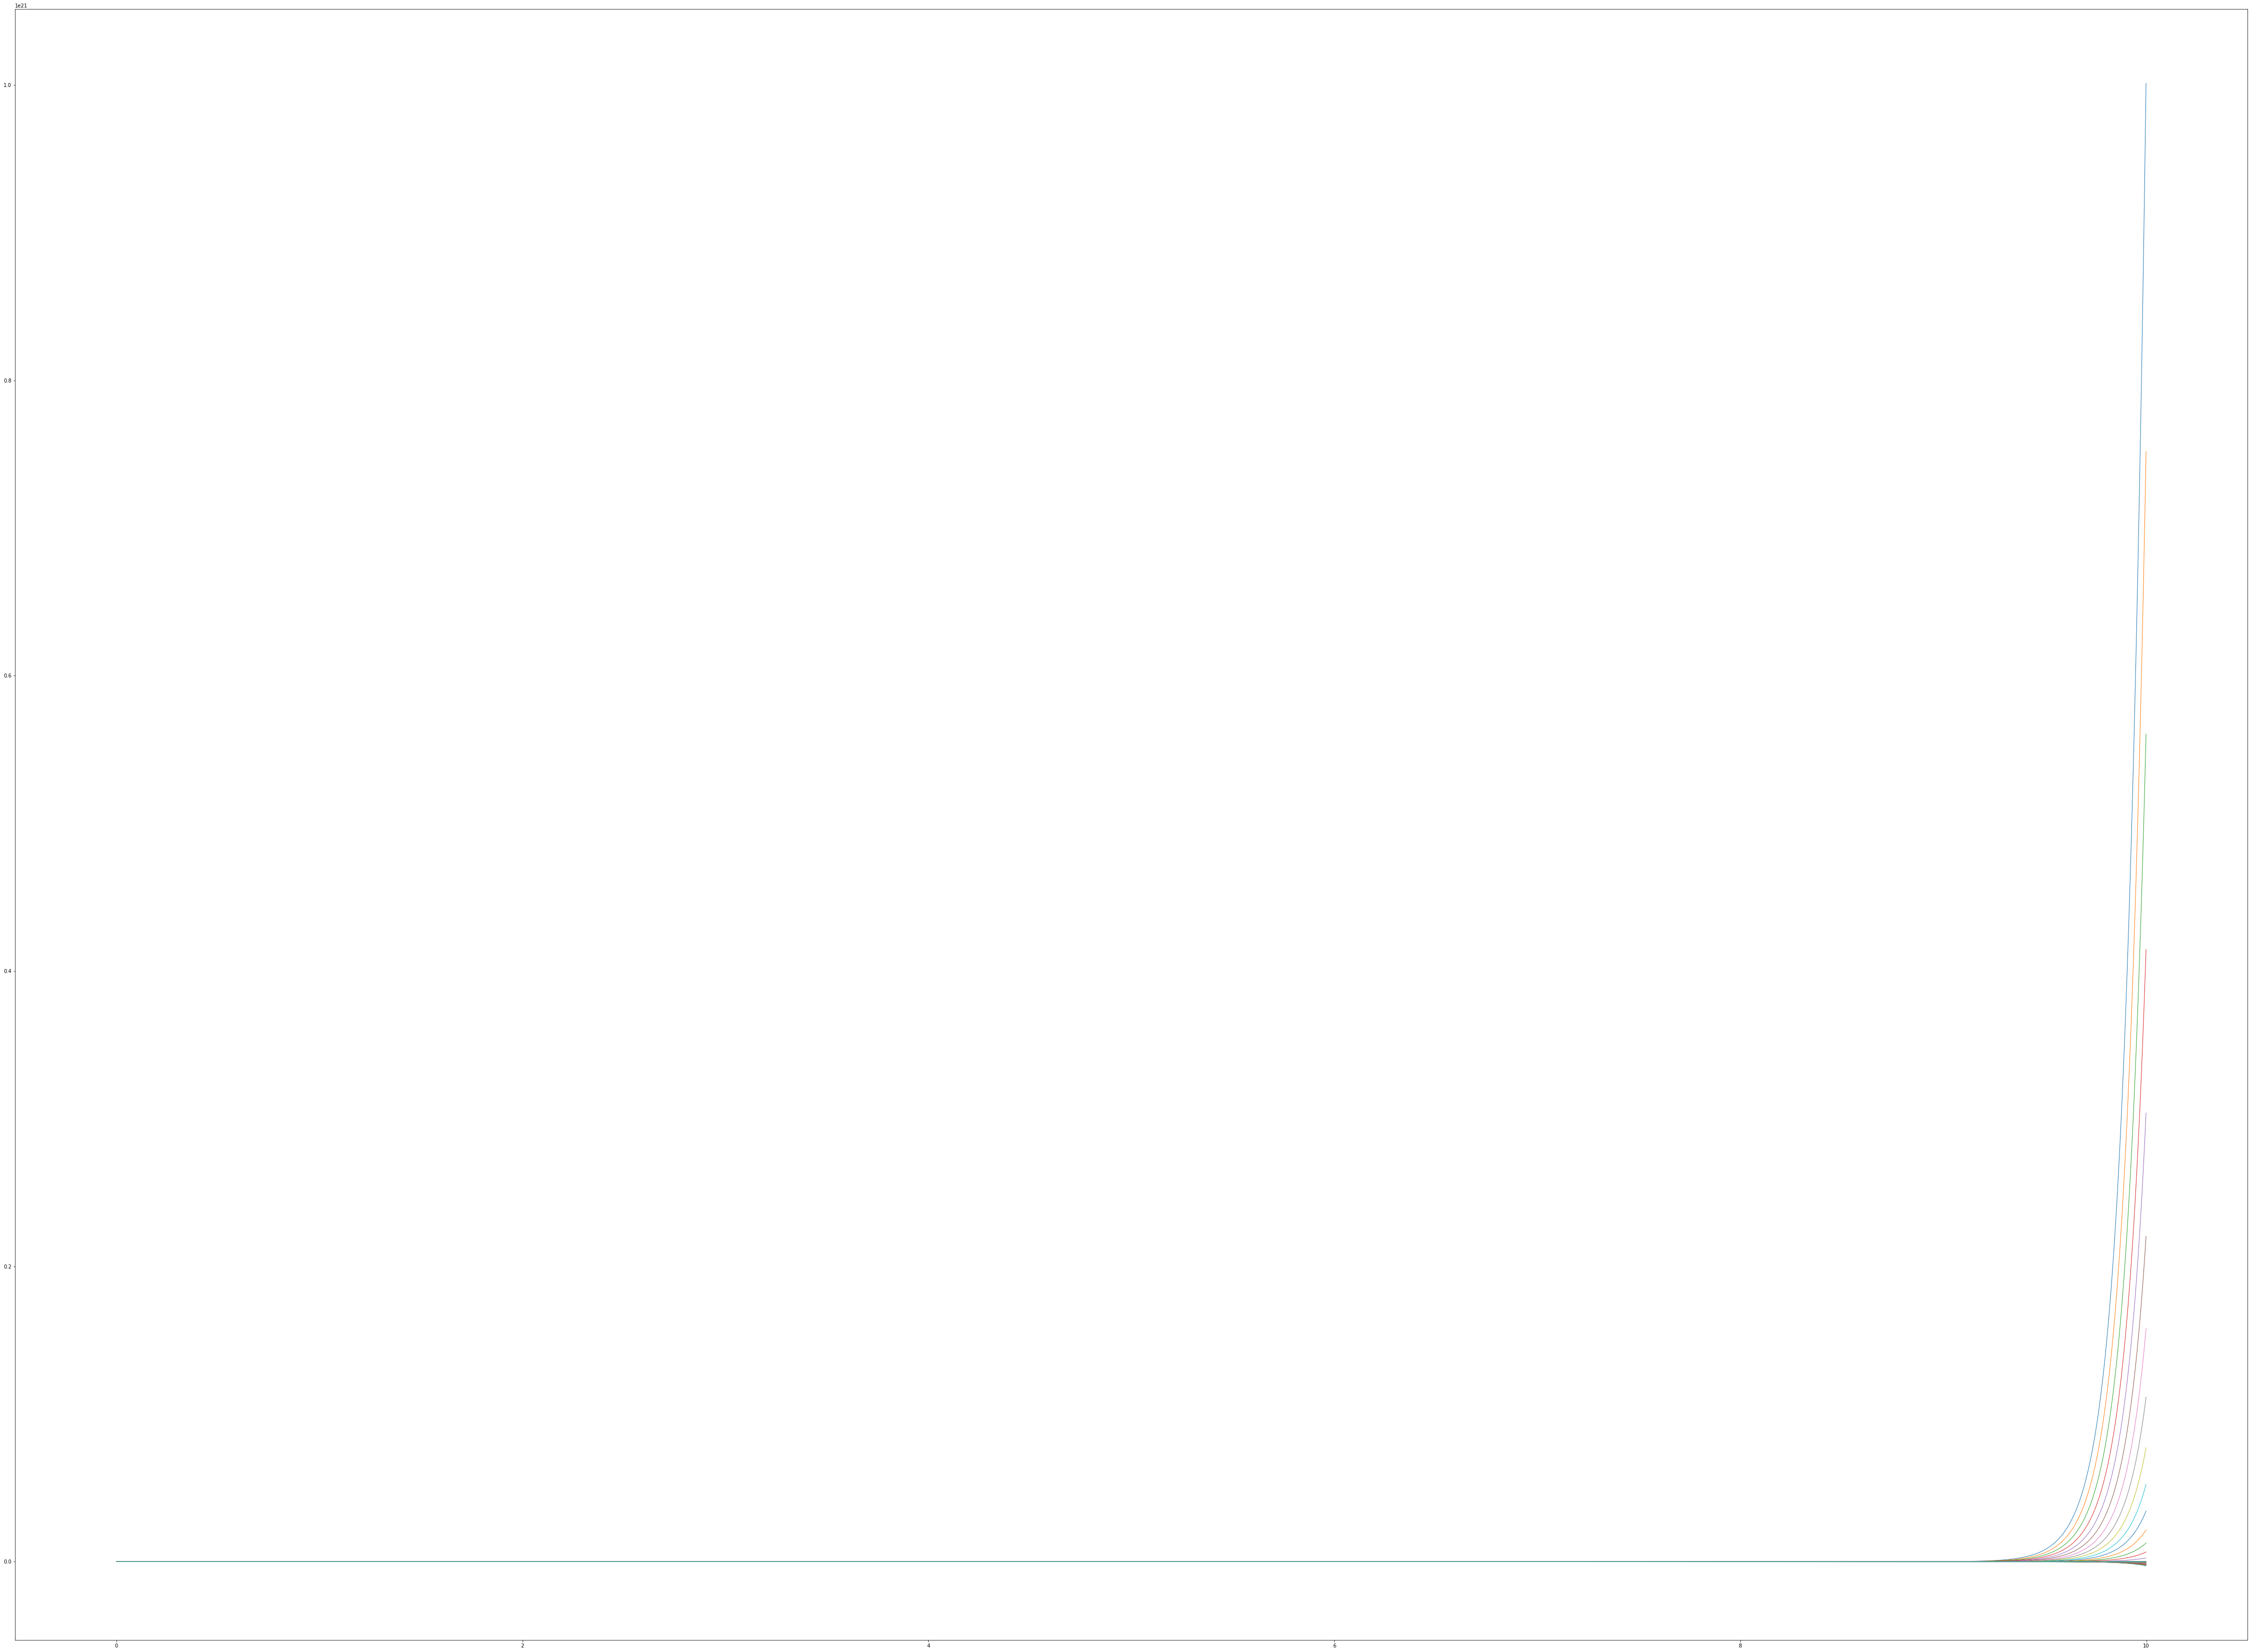

In [14]:
testvalues(1000)

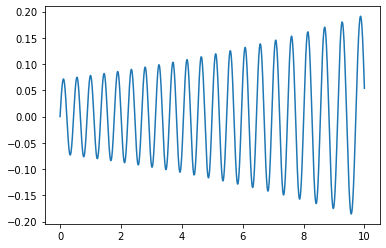

In [77]:

plt.plot((euler(0,0,1,100)[0]),euler(0,0,1,100)[1])

In [78]:
def euler2(a,aa,aaa):
    
    min_y = 0
    max_y = 10
    N=10000
    h=(max_y-min_y)/N
    u = np.zeros(N)
    y_1 = np.zeros(N)
    y_2 = np.zeros(N)
    u[0]   = a
    y_1[0] = aa
    y_2[0] = aaa


    for i in range(1,N):
        
        u[i]=u[i-1]+h
        
        y_1[i]=y_2[i-1]*h+y_1[i-1]
        
        y_2[i]=y_2[i-1]+(u[i]**2-u[i]**2)*y_1[i-1]*h
        
    return u,y_1,y_2


(0, 5)

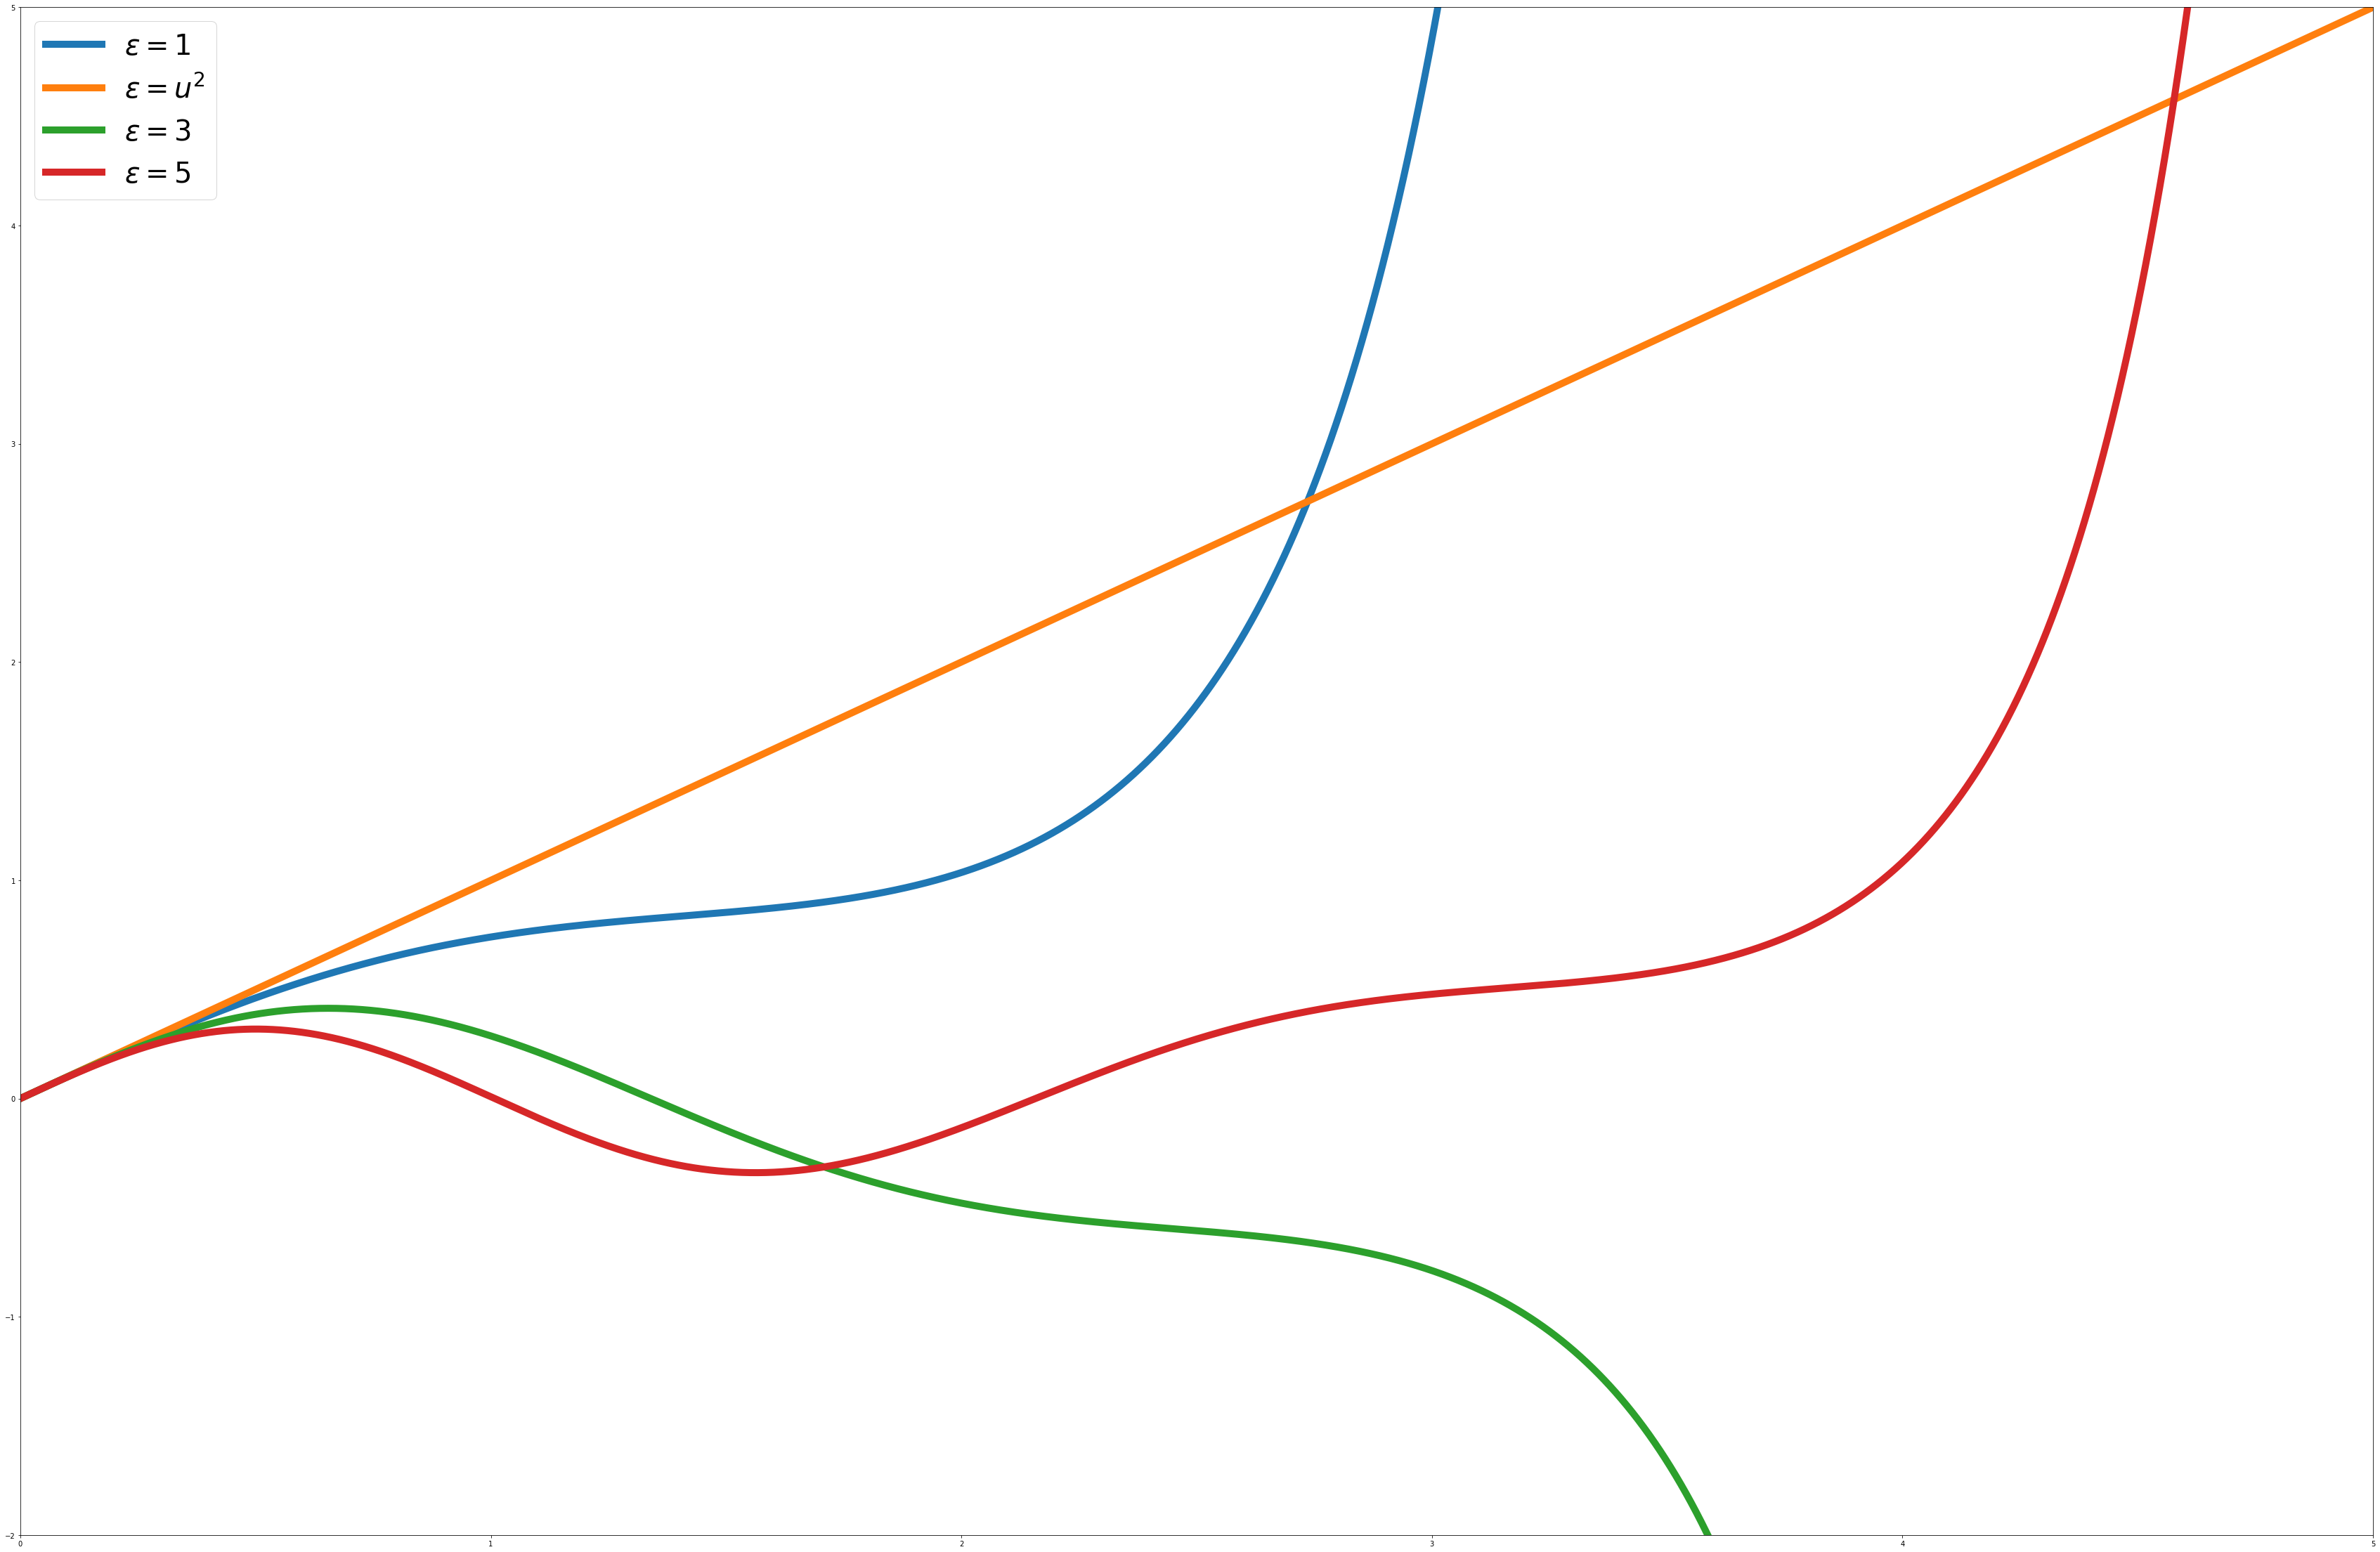

In [79]:
plt.figure(figsize=(60,40))

plt.plot(euler(0,0,1,1)[0],euler(0,0,1,1)[1],linewidth=10,label="$\epsilon = 1$")
plt.plot((euler2(0,0,1)[0]),euler2(0,0,1)[1],linewidth=10,label="$\epsilon = u^2$")
plt.plot(euler(0,0,1,3)[0],euler(0,0,1,3)[1],linewidth=10,label="$\epsilon = 3$")
plt.plot(euler(0,0,1,5)[0],euler(0,0,1,5)[1],linewidth=10,label="$\epsilon = 5$")

plt.legend(fontsize=40)
plt.ylim(-2,5)
plt.xlim(0,5)

In [80]:
def normed(arr):
    sol= arr-(euler2(0,0,1)[1])
    plt.plot(euler2(0,0,1)[0],sol)
    

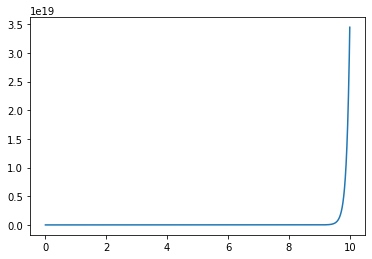

In [81]:
normed(euler(0,0,1,1)[1])

In [92]:
def euler3(a,aa,aaa,eps):
    
    min_y = 0
    max_y = 10
    N=10000
    h=(max_y-min_y)/N
    y = np.zeros(N)
    y_1 = np.zeros(N)
    y_2 = np.zeros(N)
    y_3 = np.zeros(N)
    y[0]   = a
    y_1[0] = aa
    y_2[0] = aaa
    y_3[0] = 0

    for i in range(1,N):
        
        y_2[i]=y_3[i-1]*h+y_2[i-1]
        
        y[i]=y[i-1]+h
        
        y_1[i]=y_2[i-1]*h+y_1[i-1]
        
        y_3[i]=(-y[i]**2+eps)*y_1[i]
        
    return y,y_1

(2, 8)

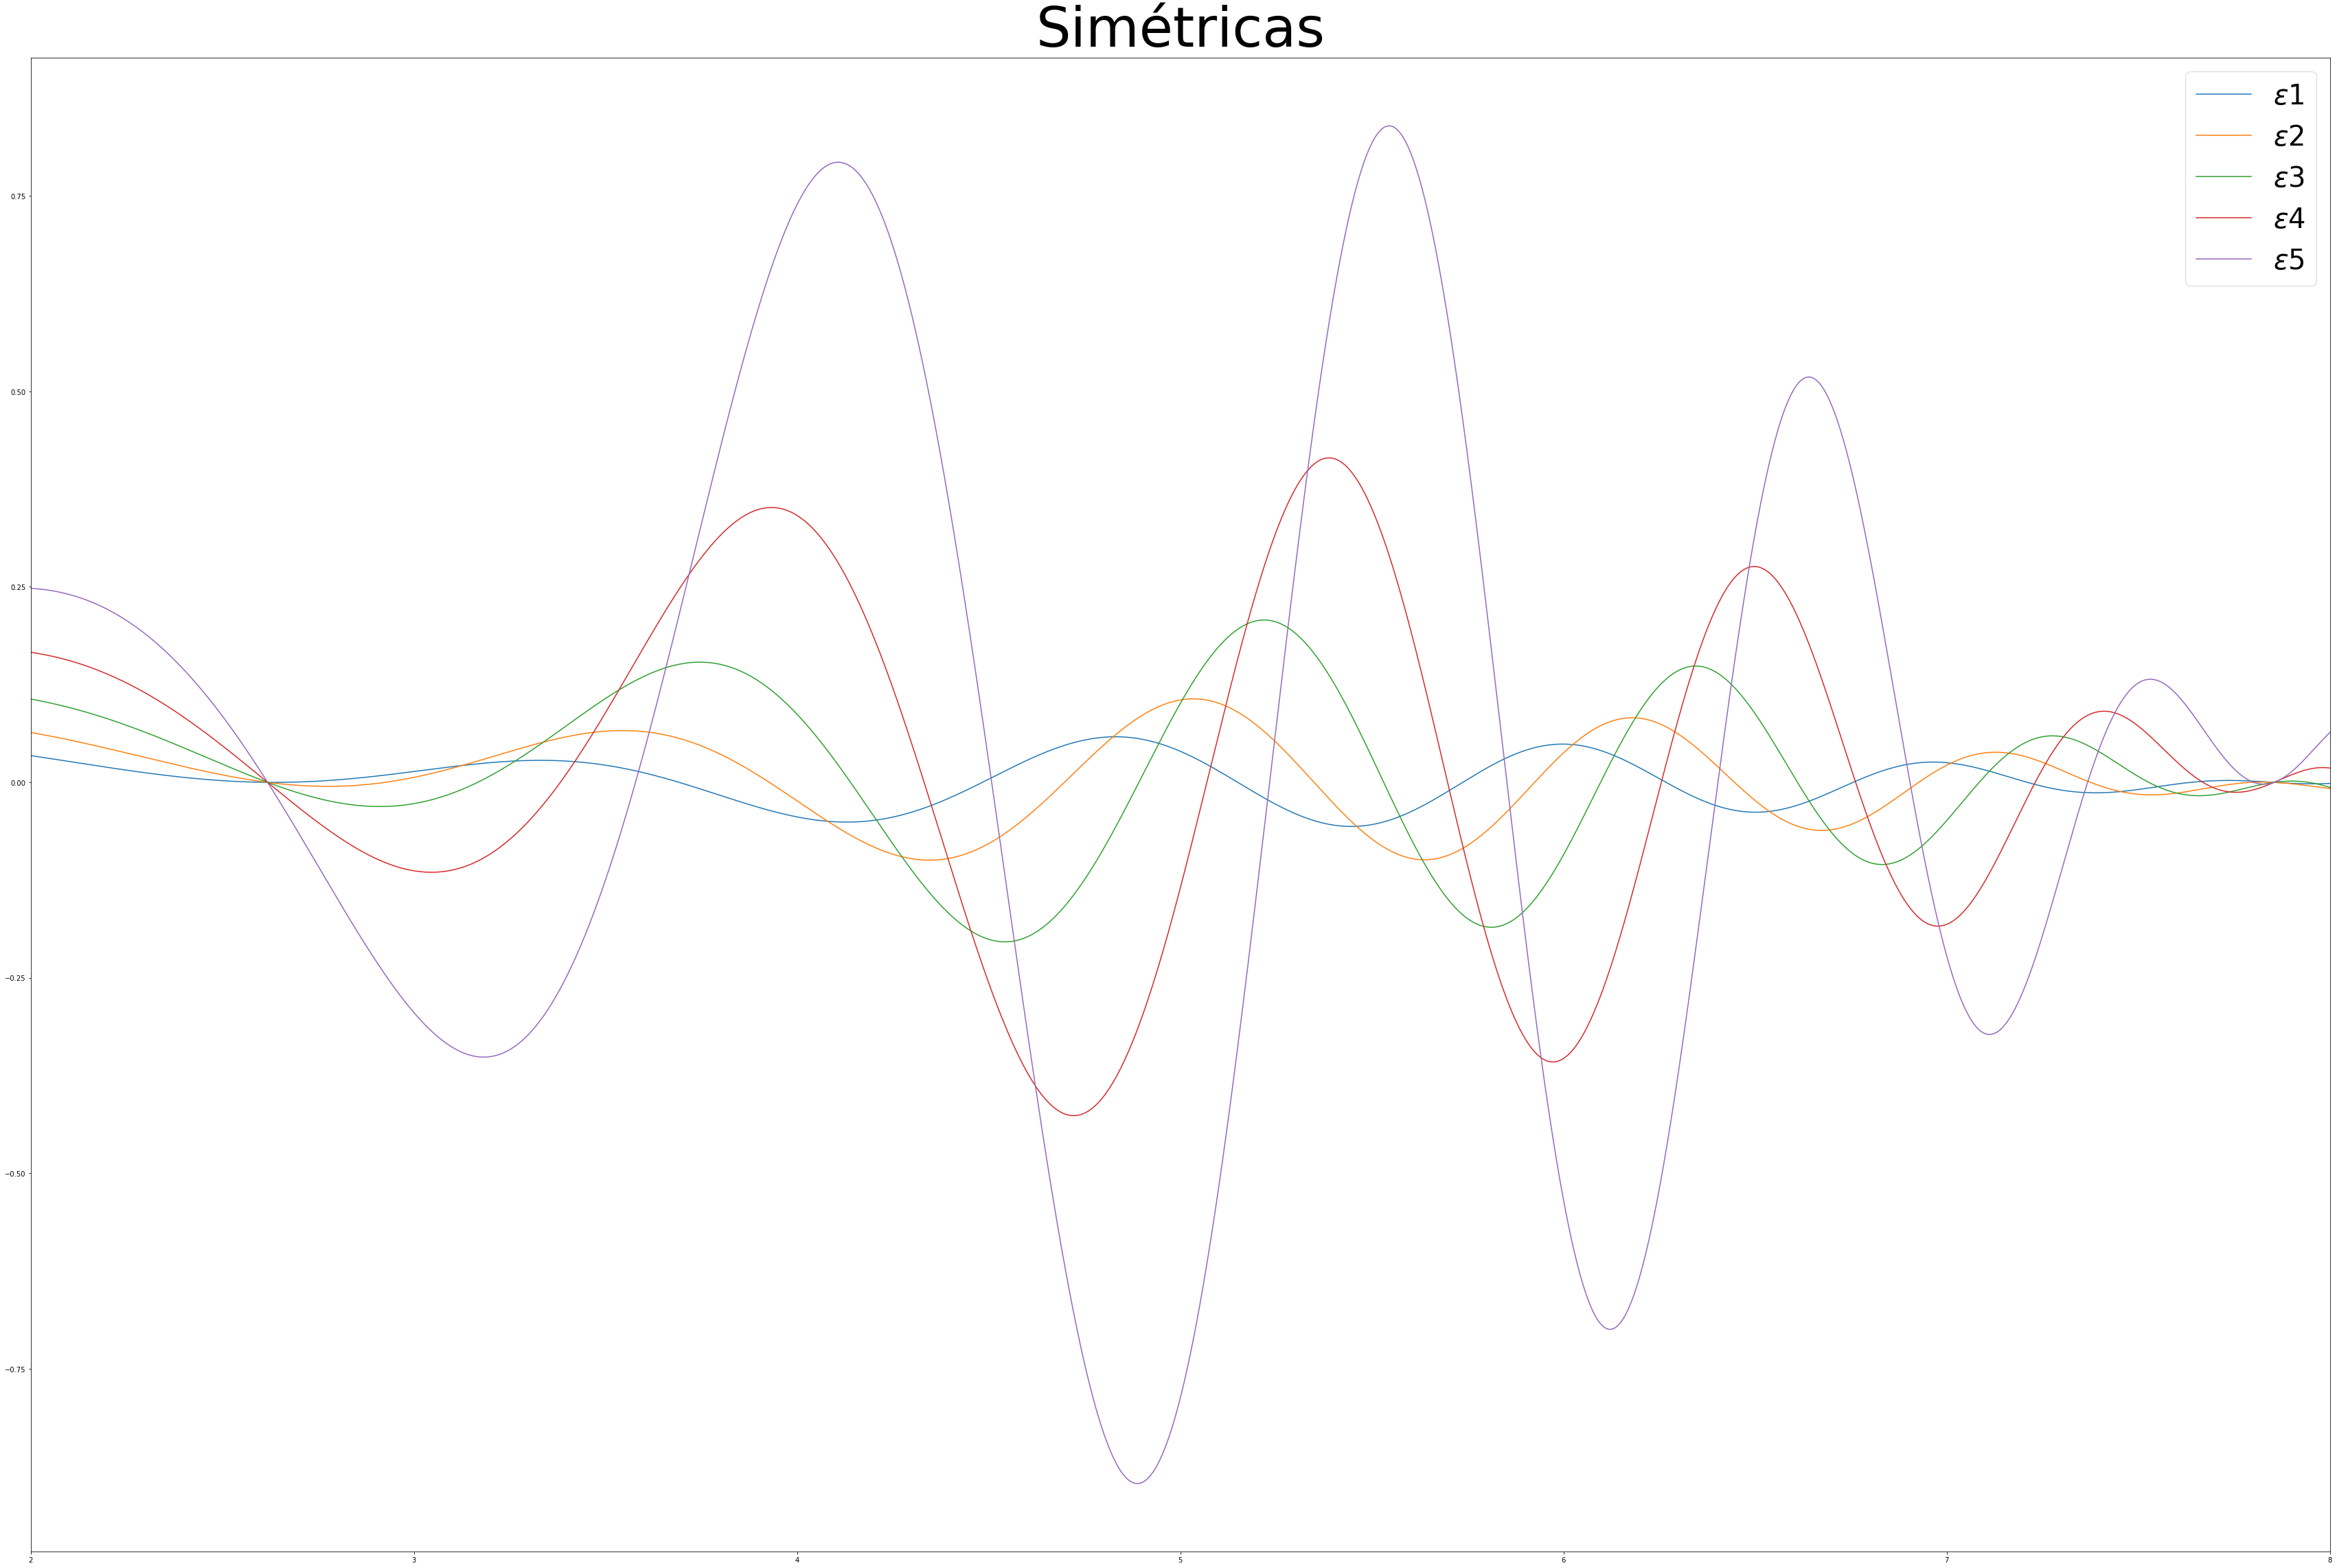

In [107]:
plt.figure(figsize=(60,40))

for i in range(1,6):
    lab=str(i)
    plt.plot(euler3(0,0,1,i)[0],euler3(0,0,1,i)[1]*np.cos(euler3(0,0,1,i)[0]*0.6)/18,label= "$\epsilon$" + lab)
#plt.title("Simétricas",fontsize=80)
plt.legend(fontsize=40)
plt.xlim(2,8)
    